In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
df = pd.read_csv("sim_data_full.csv")

# SMC

In [6]:
# scenarios_to_plot = [13,30,35,36]
scenarios_to_plot = [13,35,36]
df_smcplot = df[np.logical_and(df["archetype"]=="Sahel",
                               np.in1d(df["scenario_number"], scenarios_to_plot))]
# label_dict = {30: "u5 SMC",
label_dict = {13: "u5 SMC + IPTsc",
              35: "u10 SMC",
              36: "u15 SMC"}

# color_dict = {30: "C0",
color_dict = {13: "C1",
              35: "C2",
              36: "C3"}

df_smcplot["label"] = df_smcplot["scenario_number"].apply(lambda x: label_dict[x])


C:\Users\joshsu\AppData\Local\Temp/ipykernel_26952/1373064850.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smcplot["label"] = df_smcplot["scenario_number"].apply(lambda x: label_dict[x])


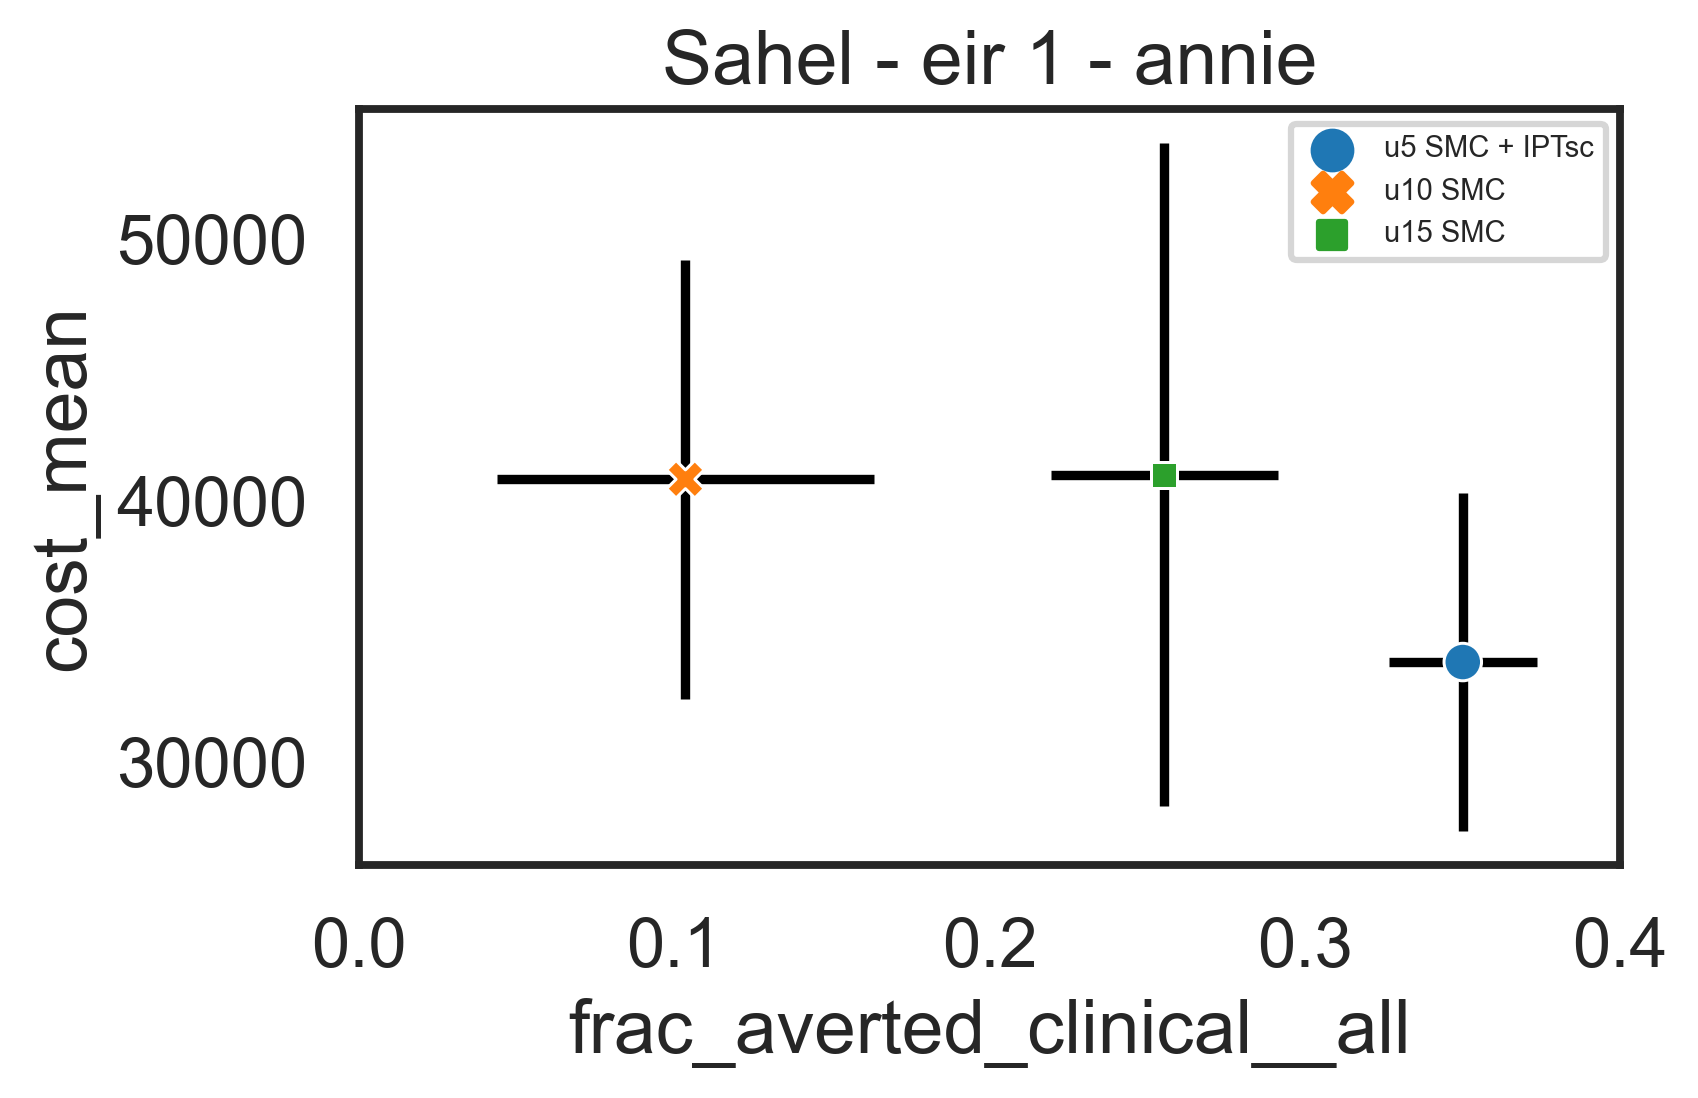

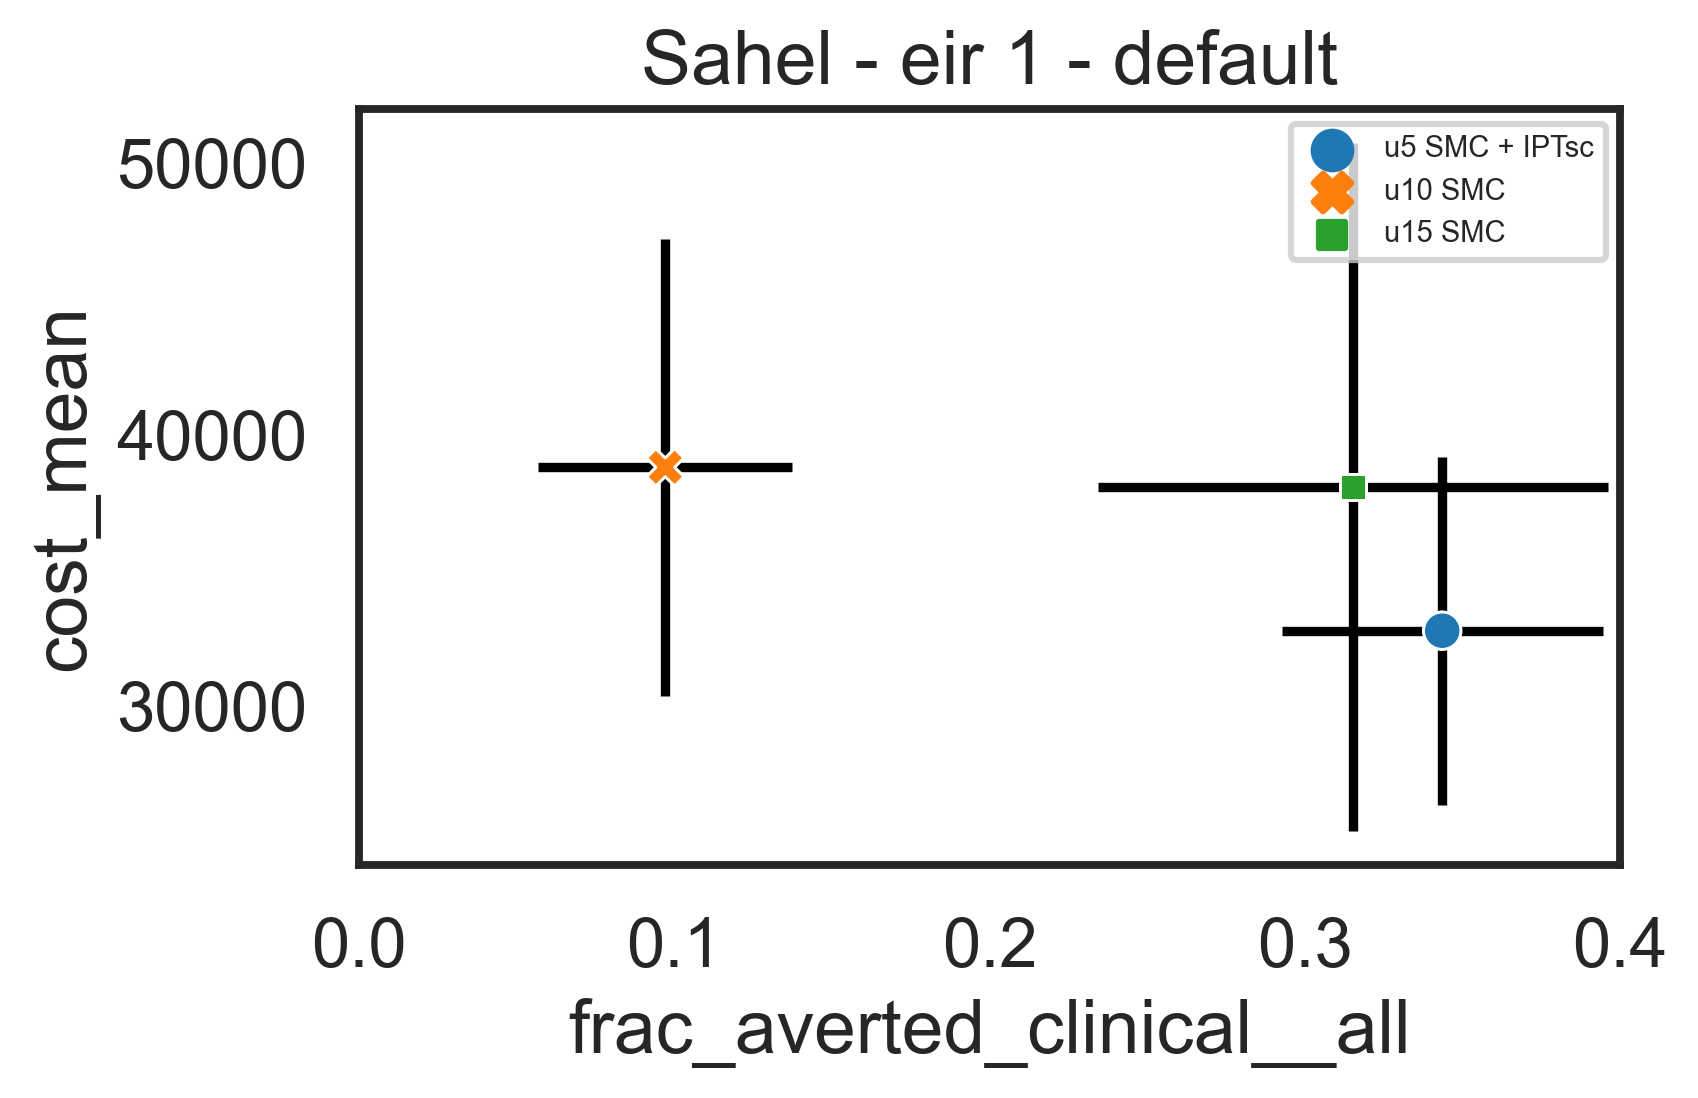

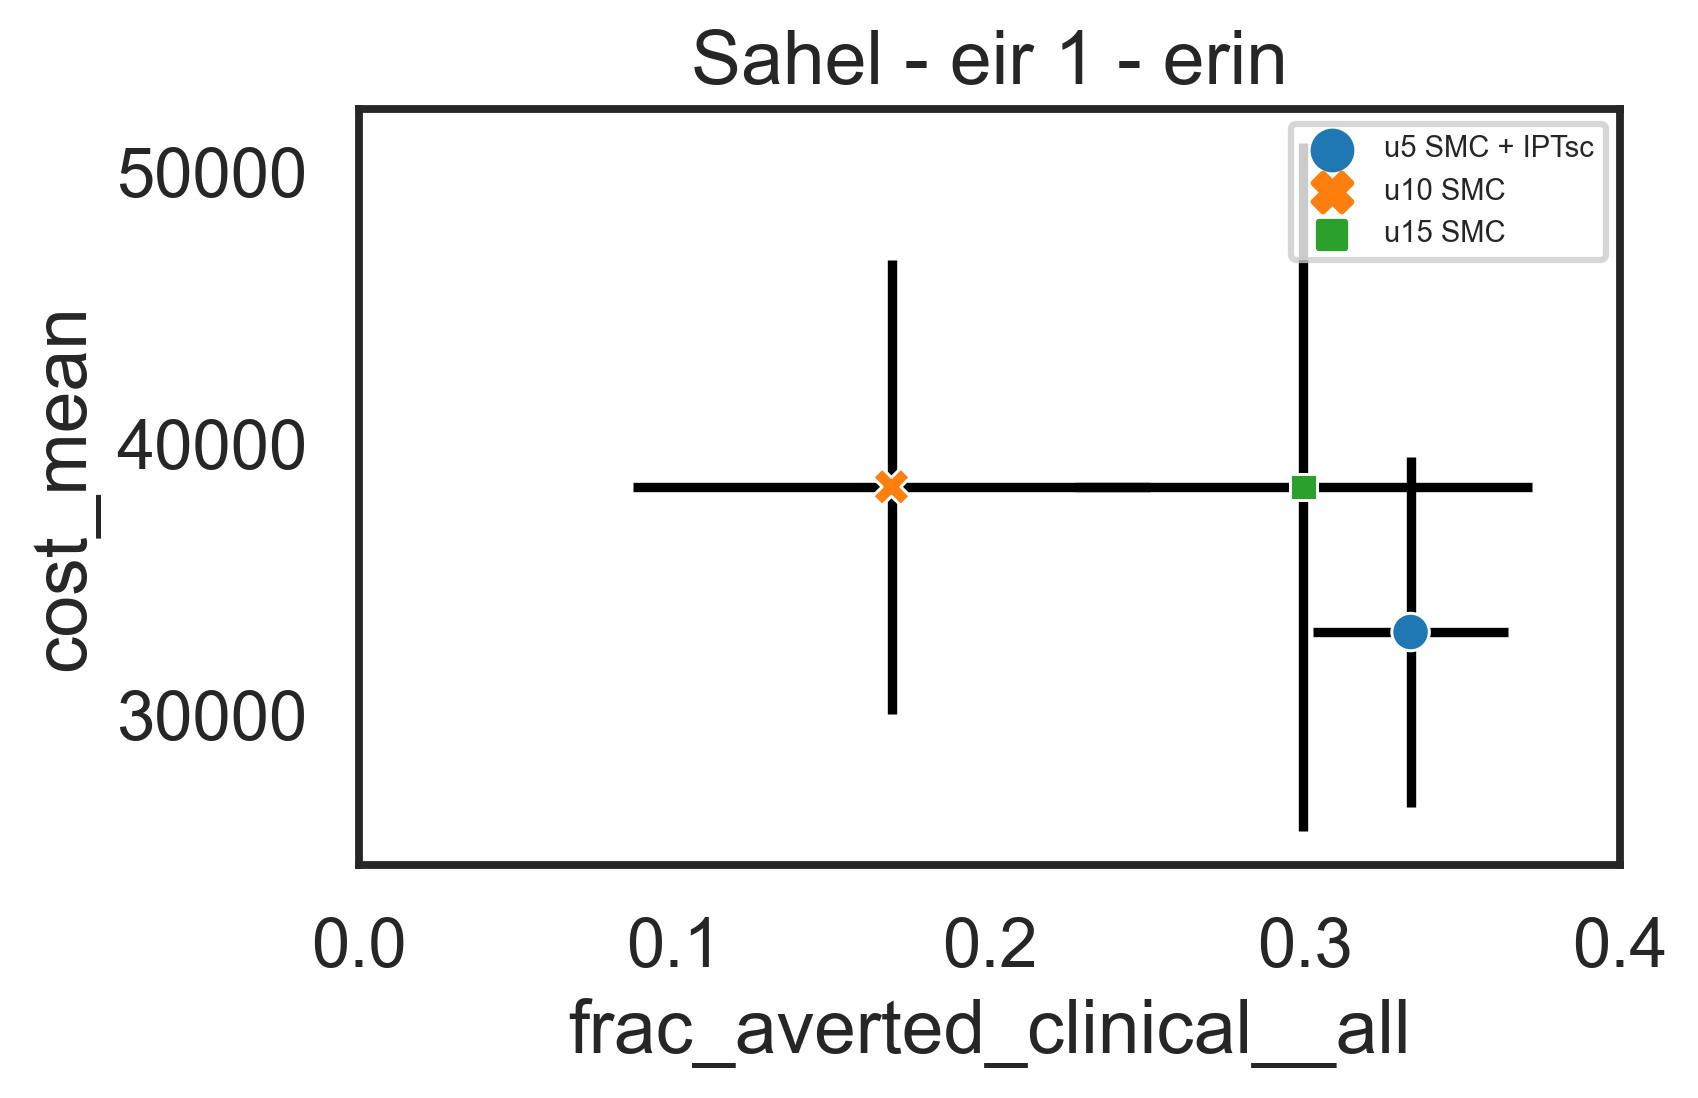

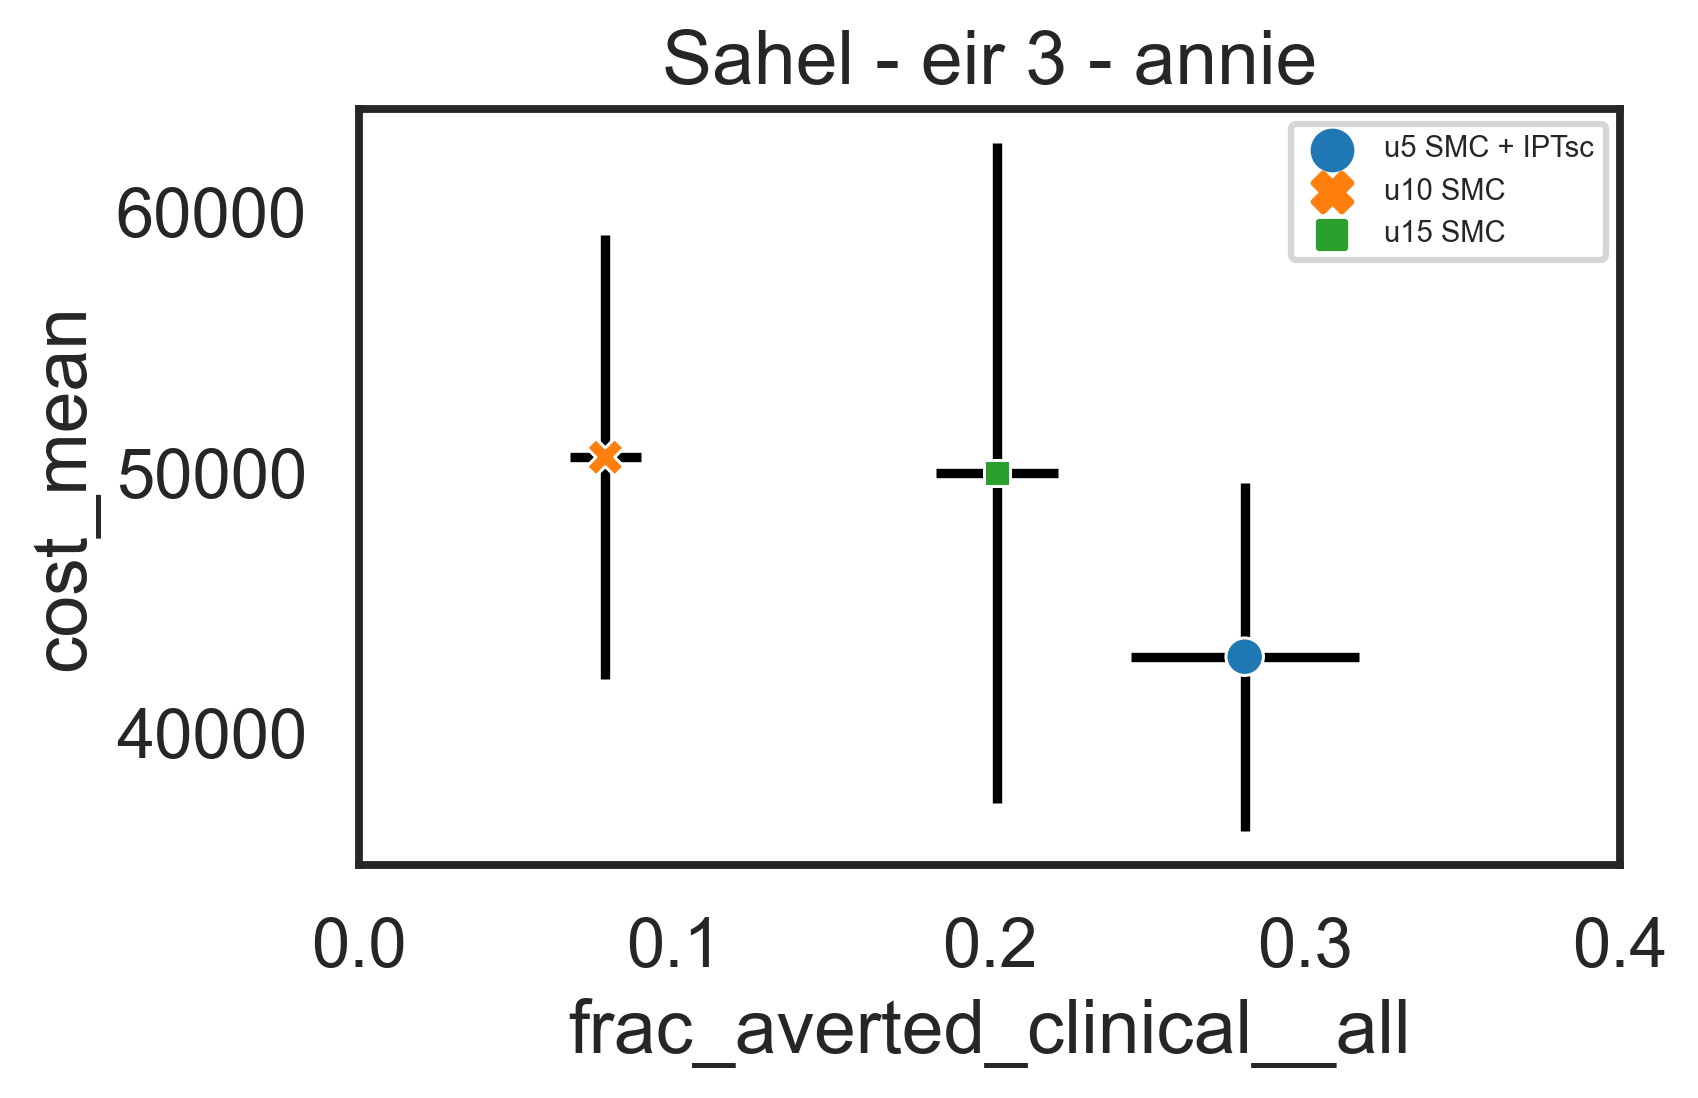

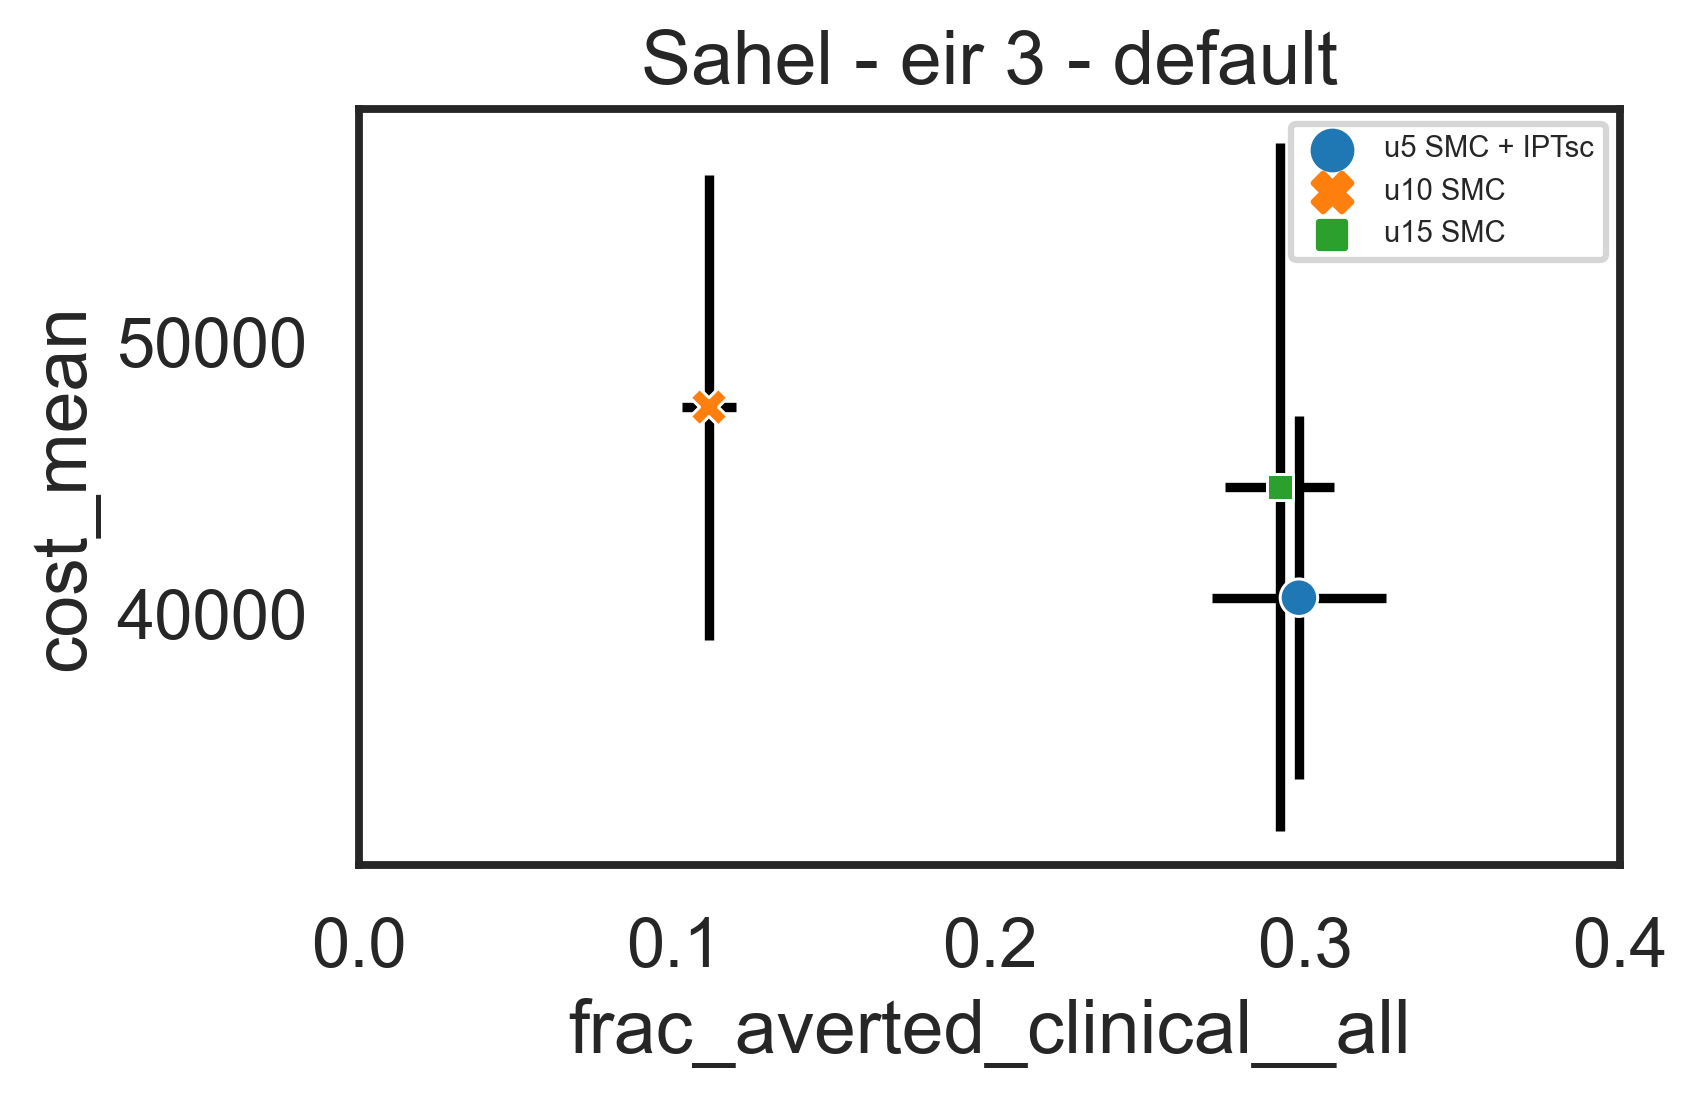

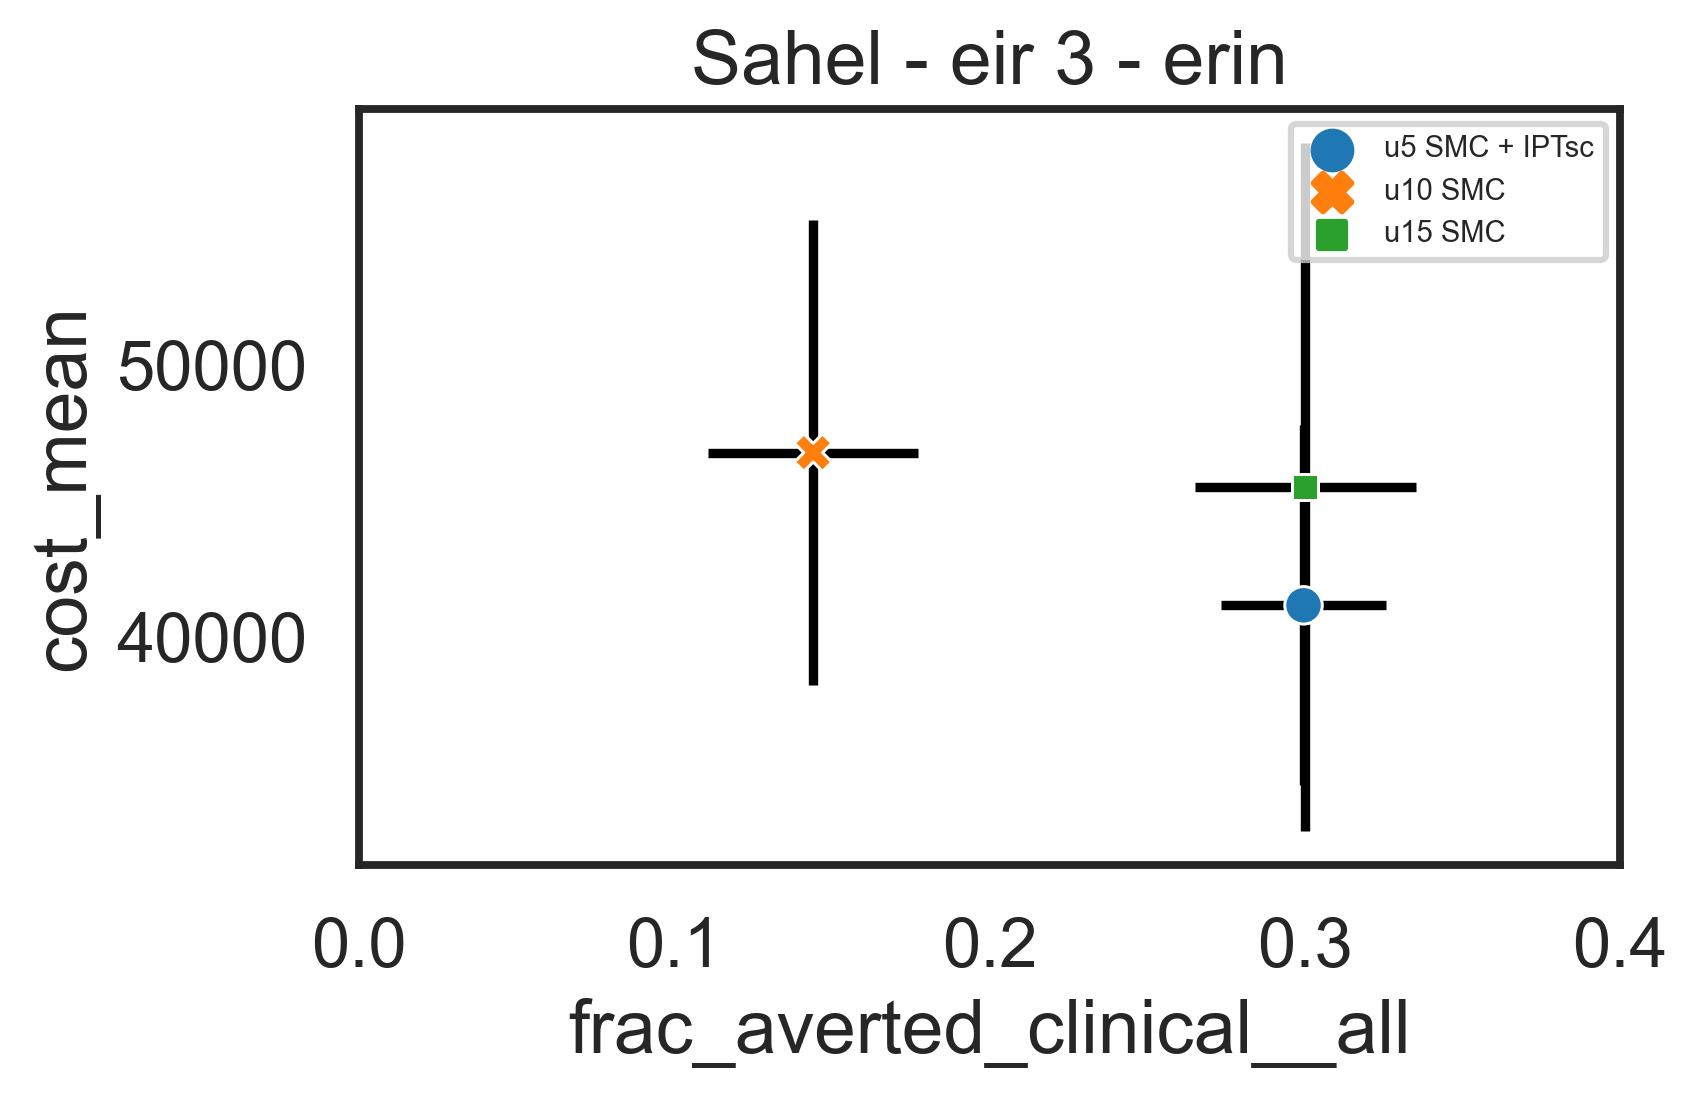

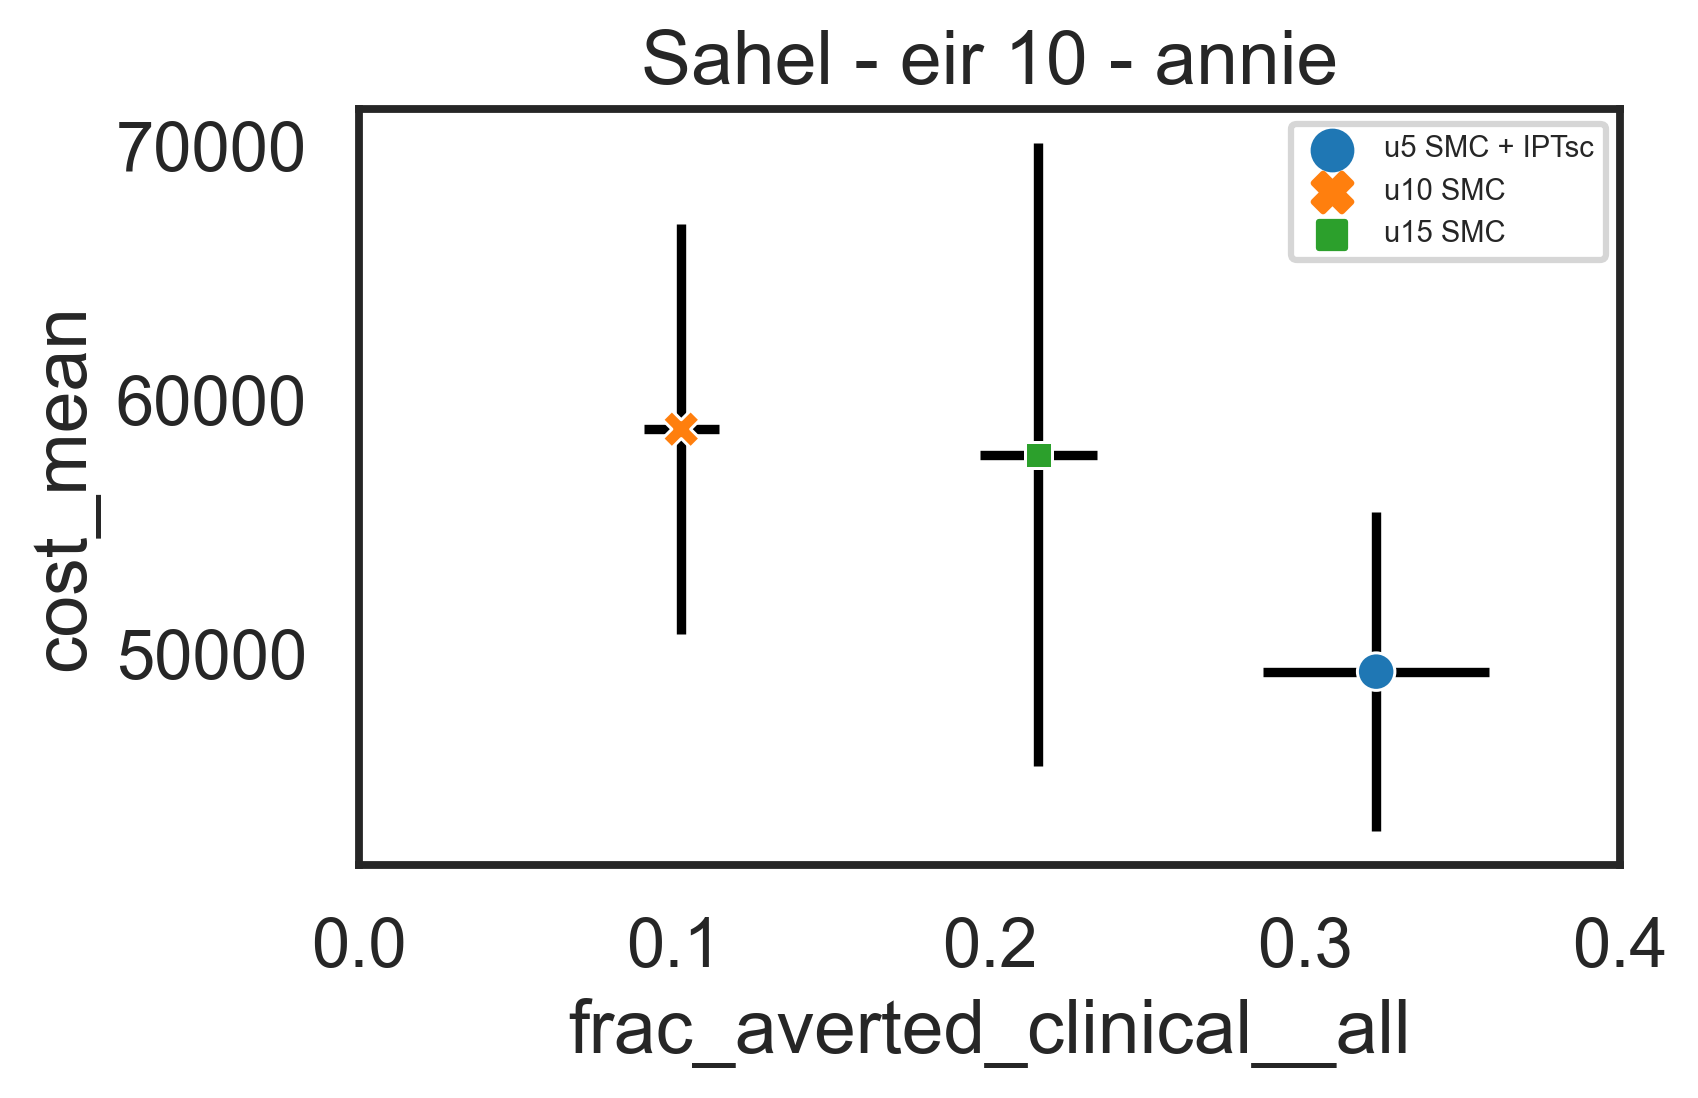

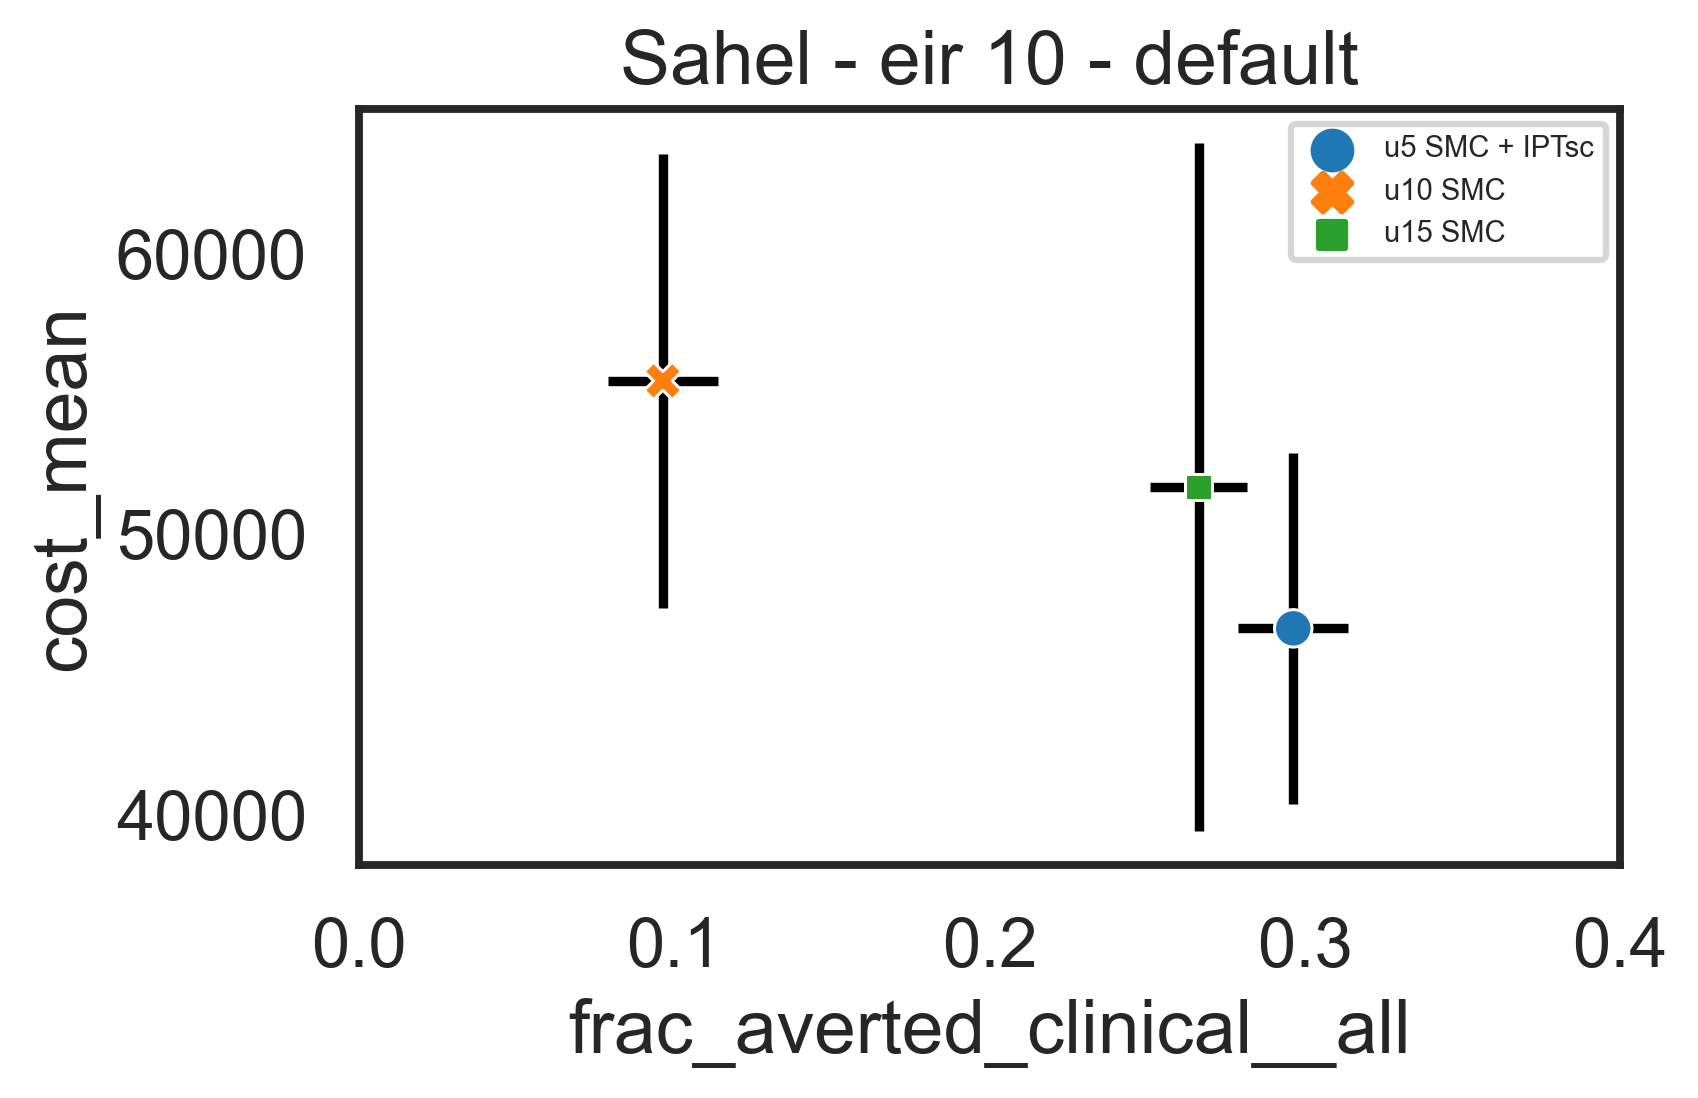

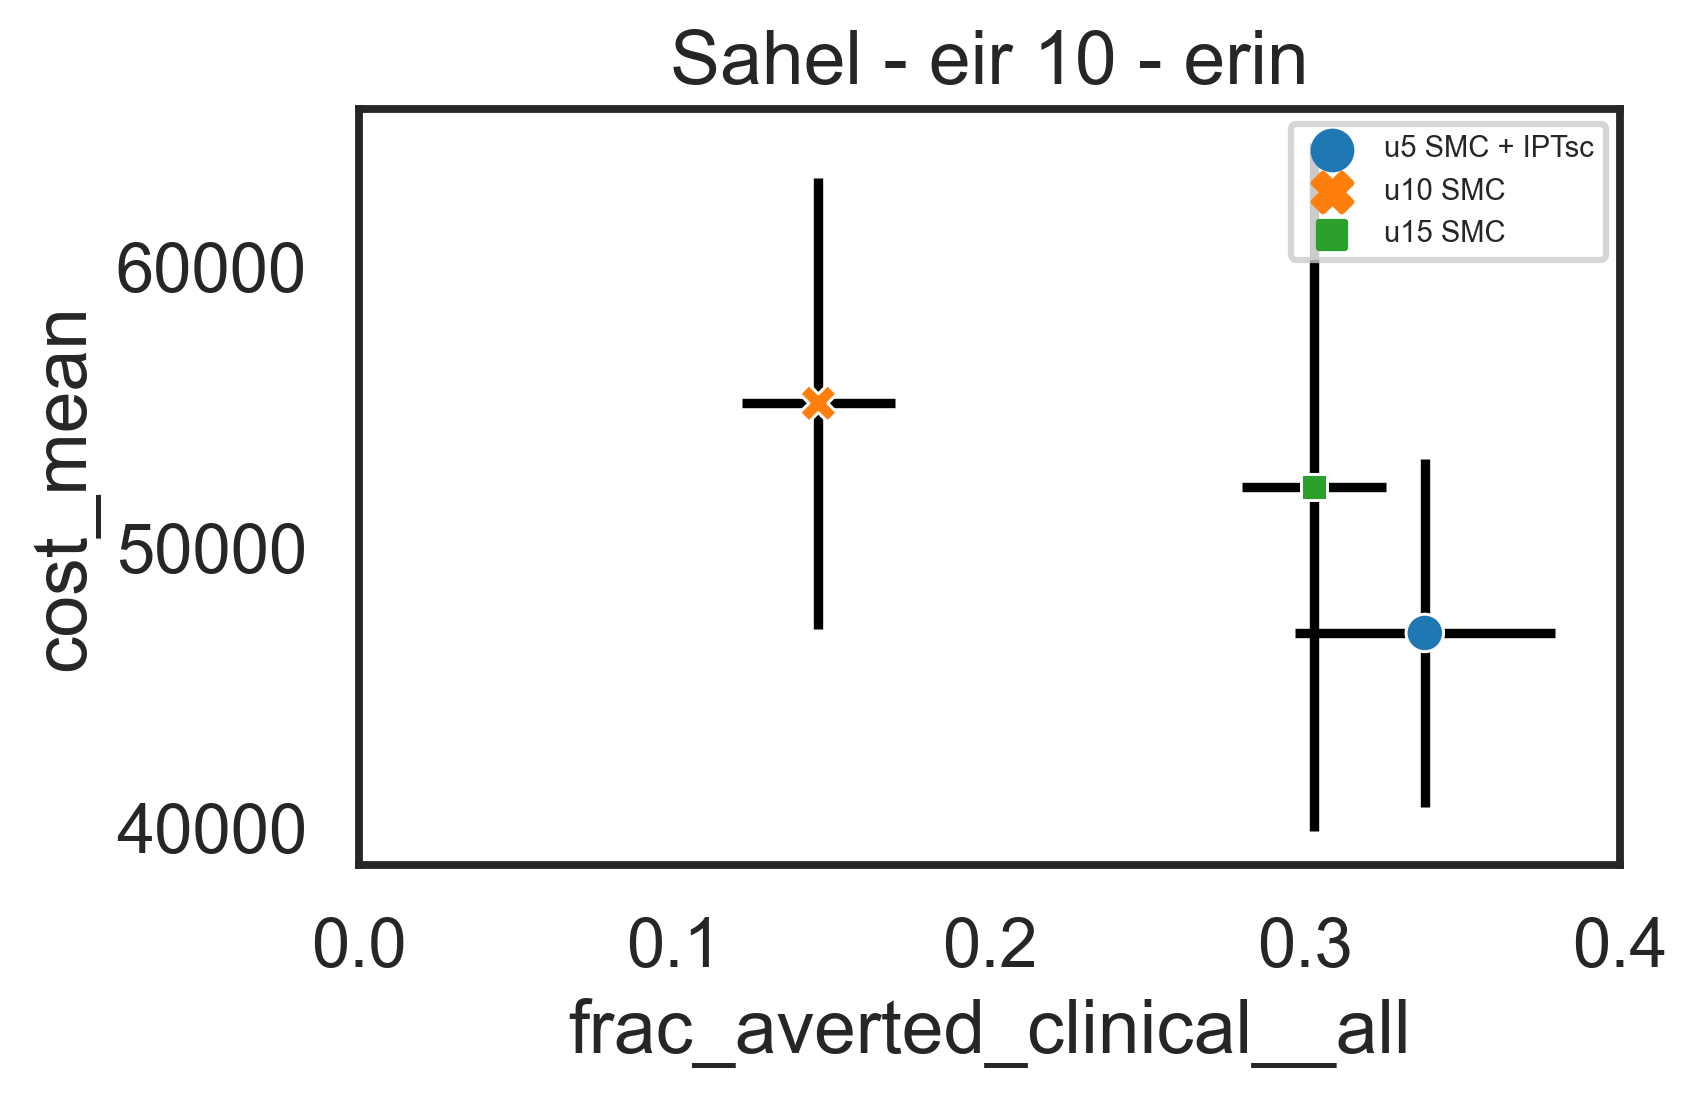

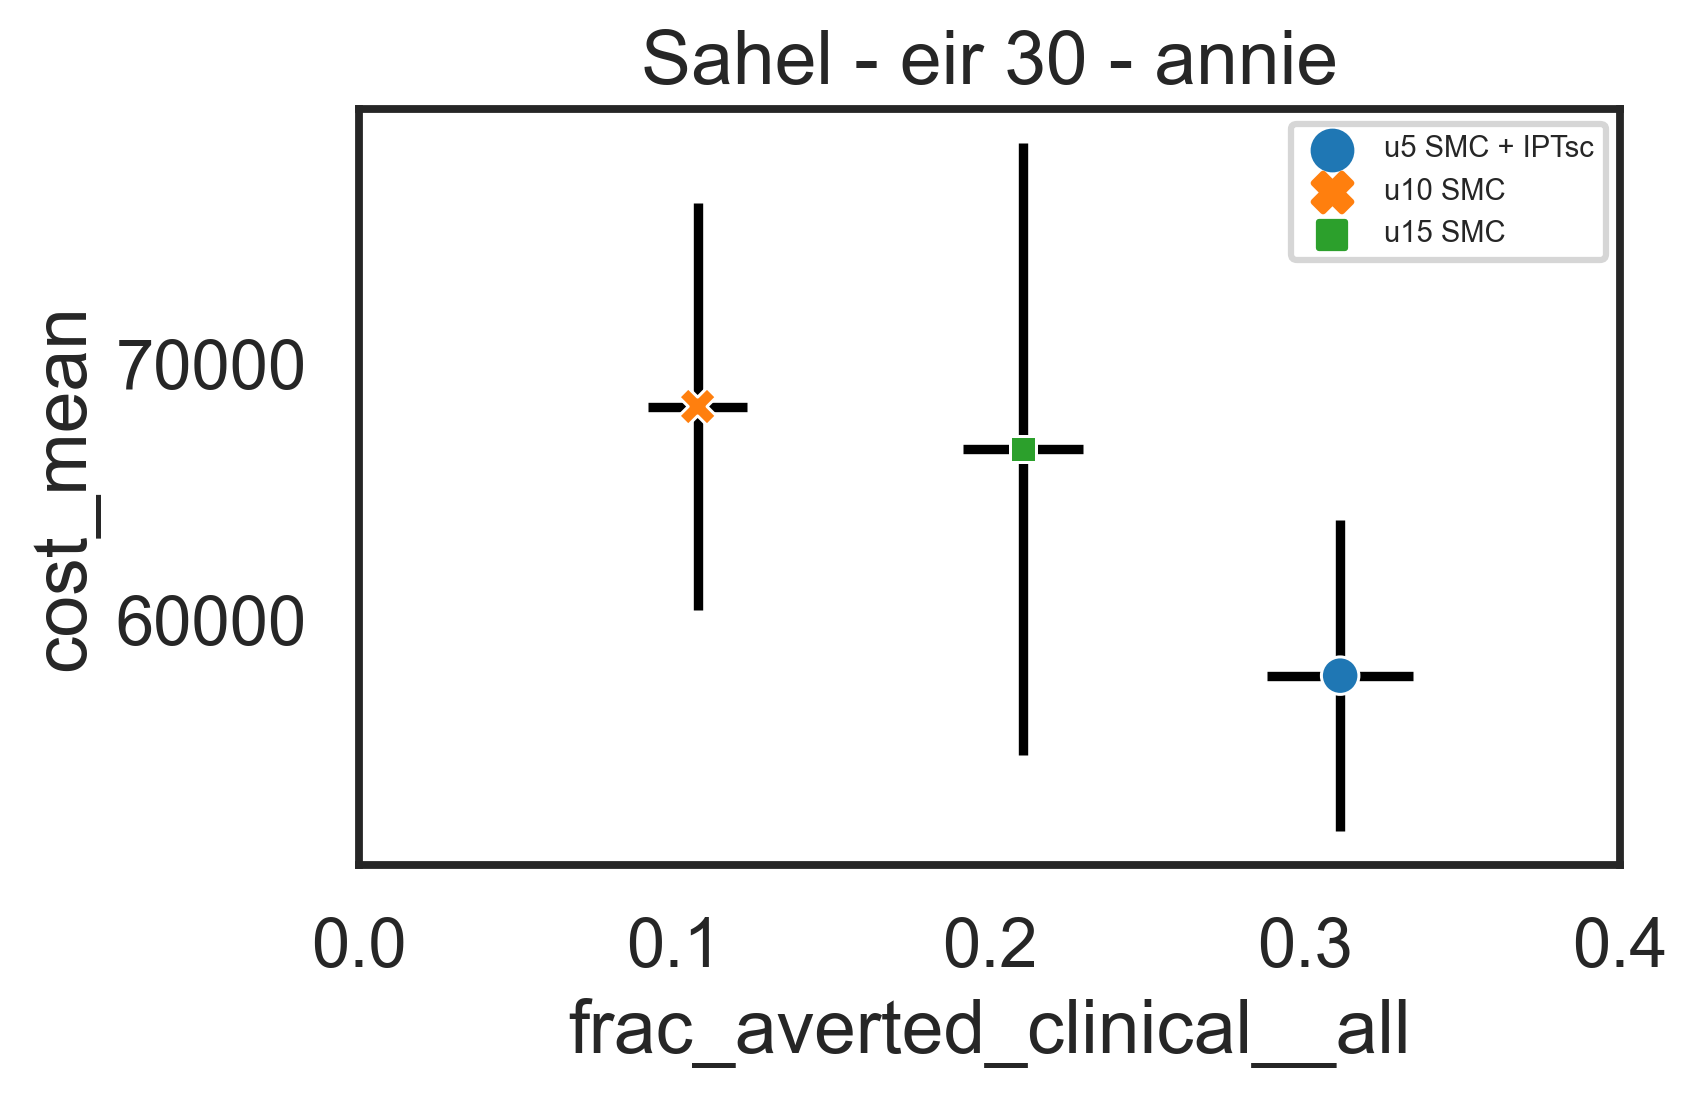

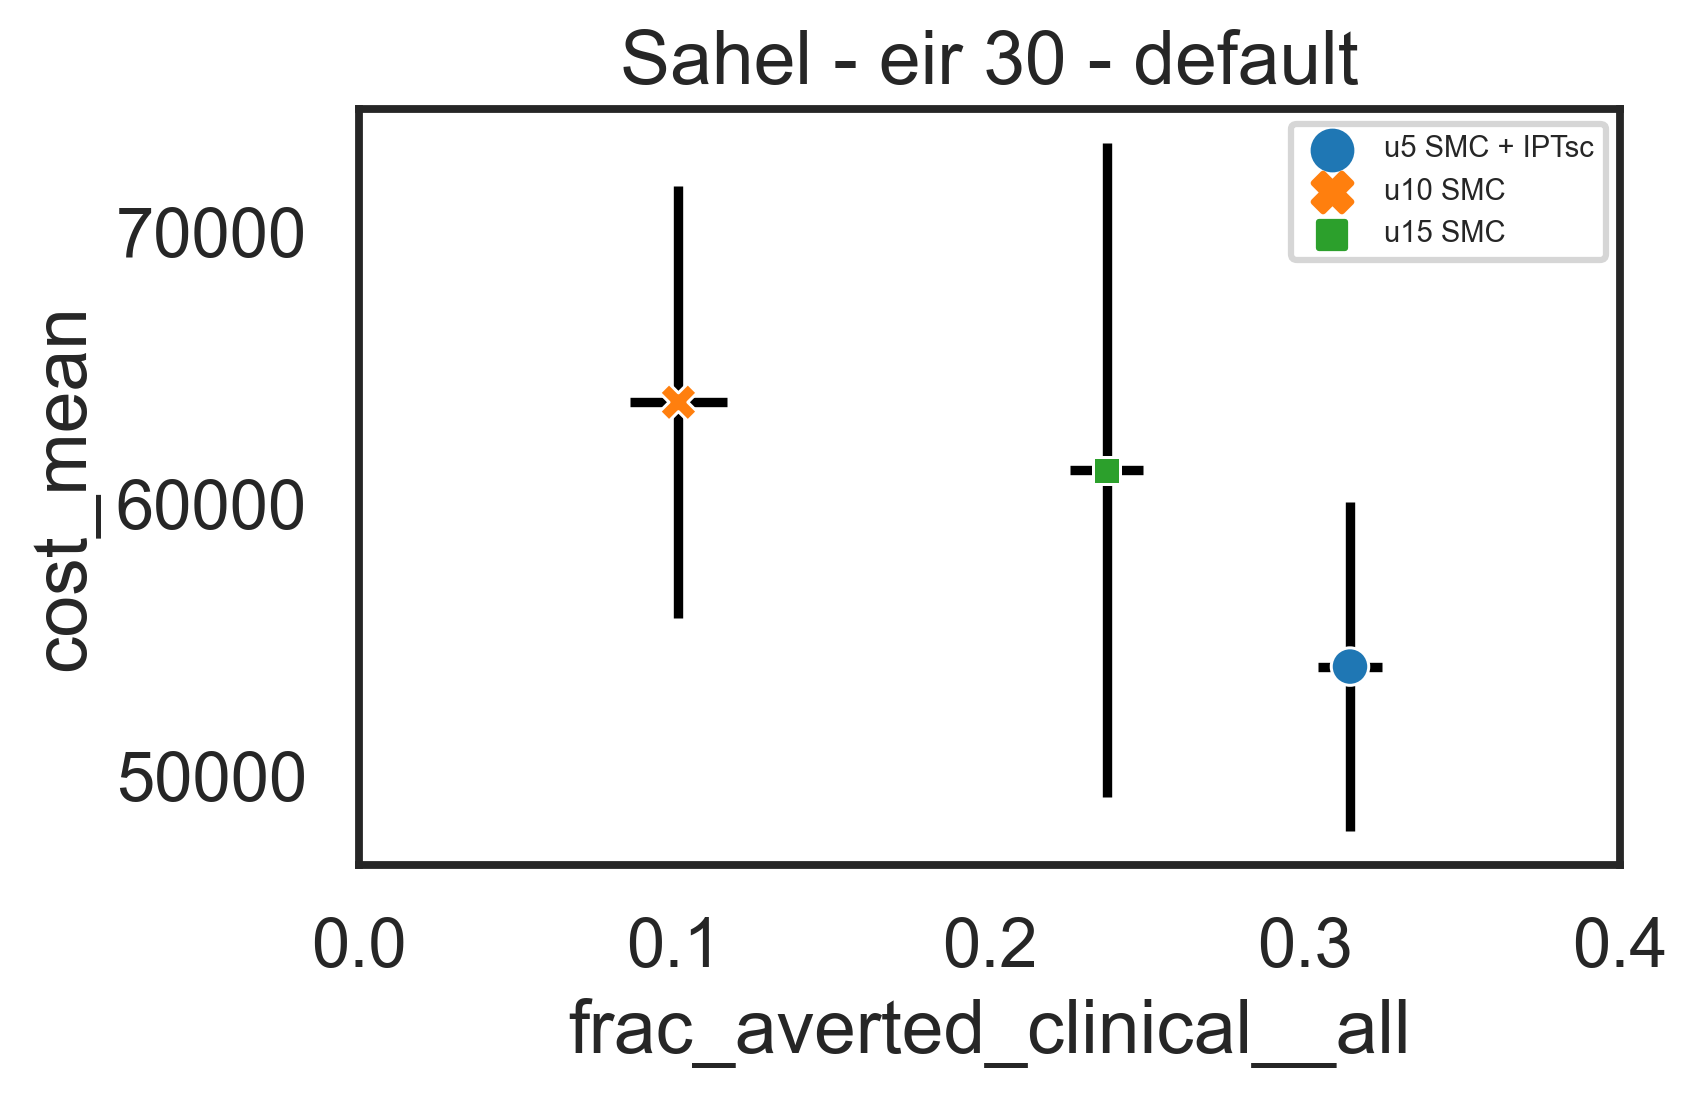

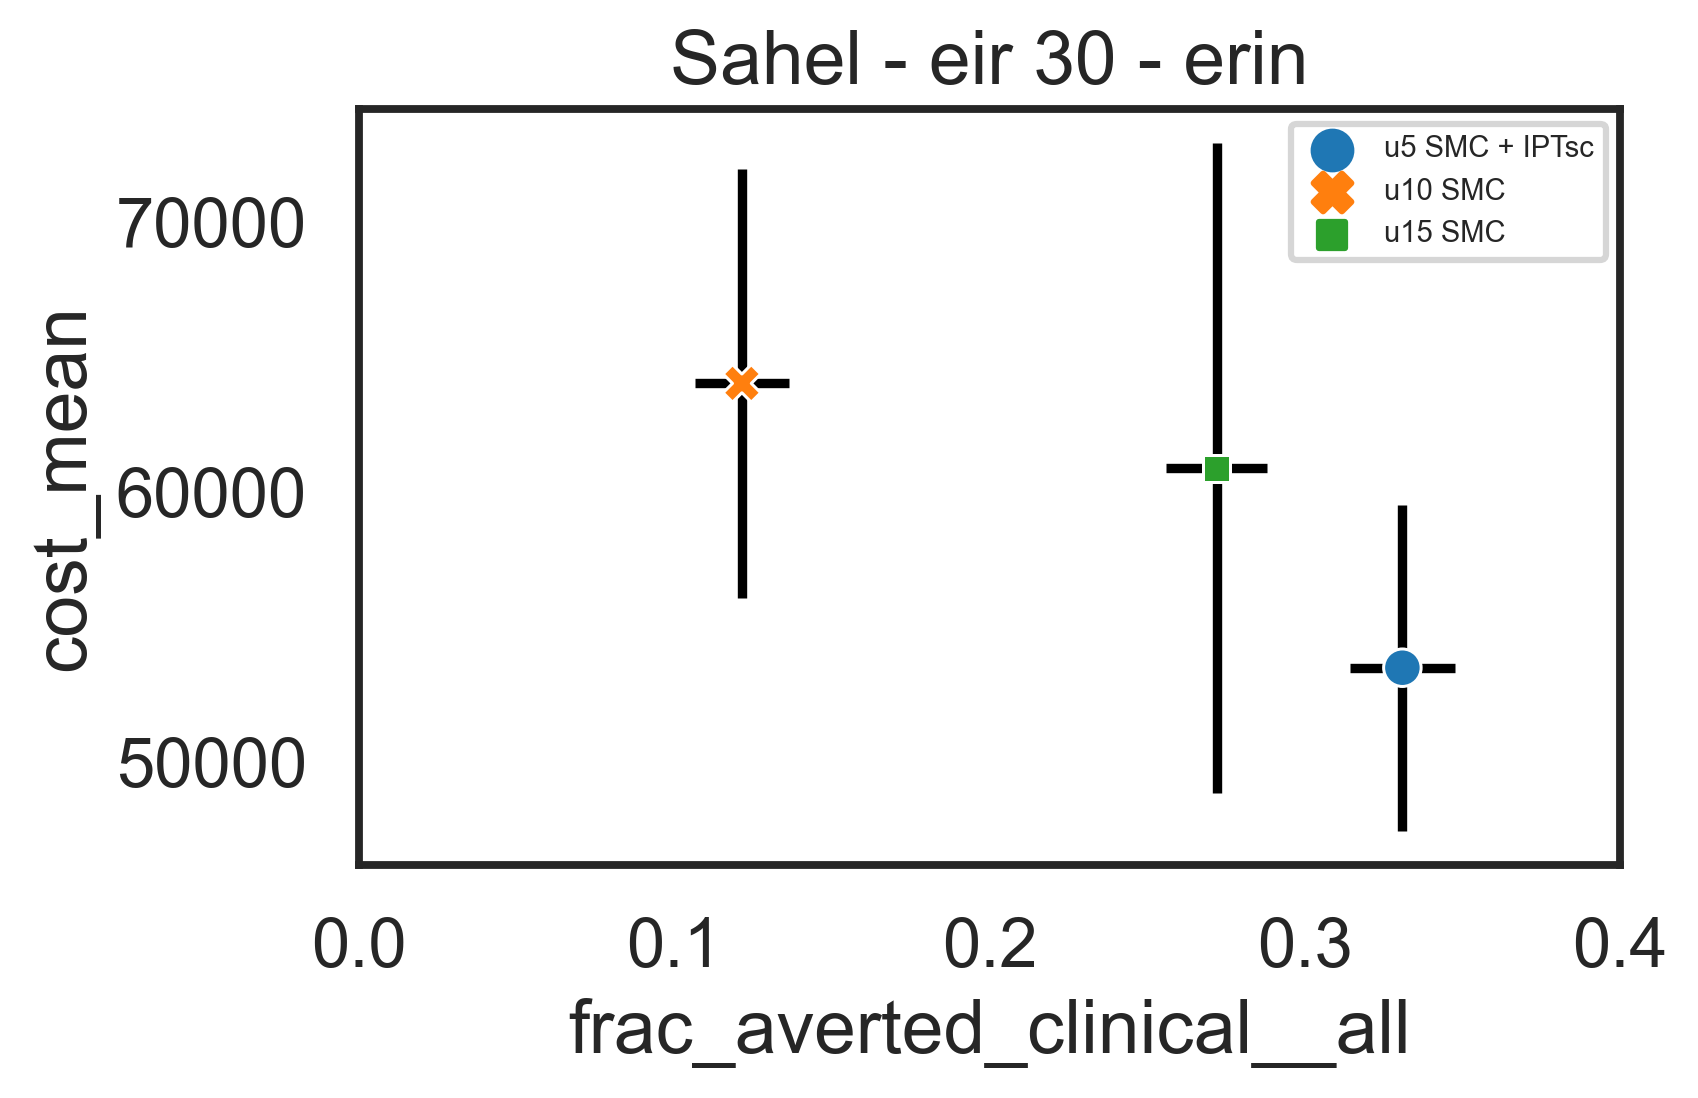

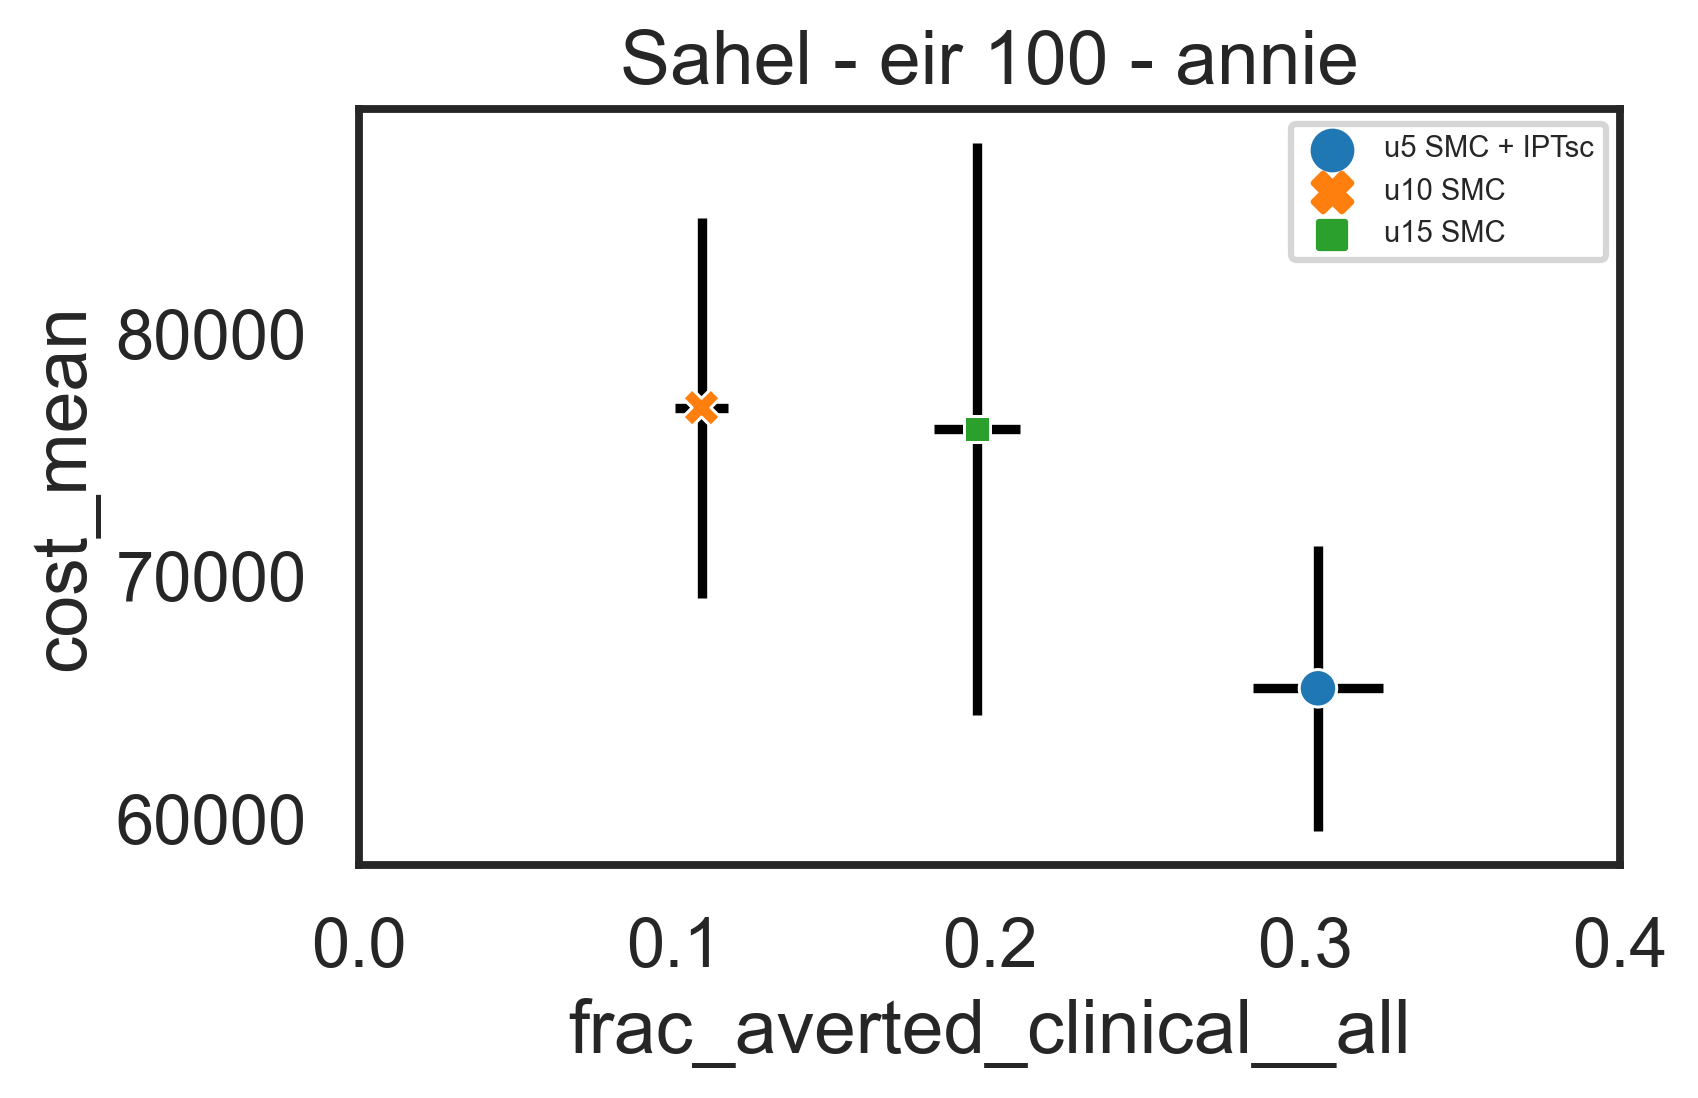

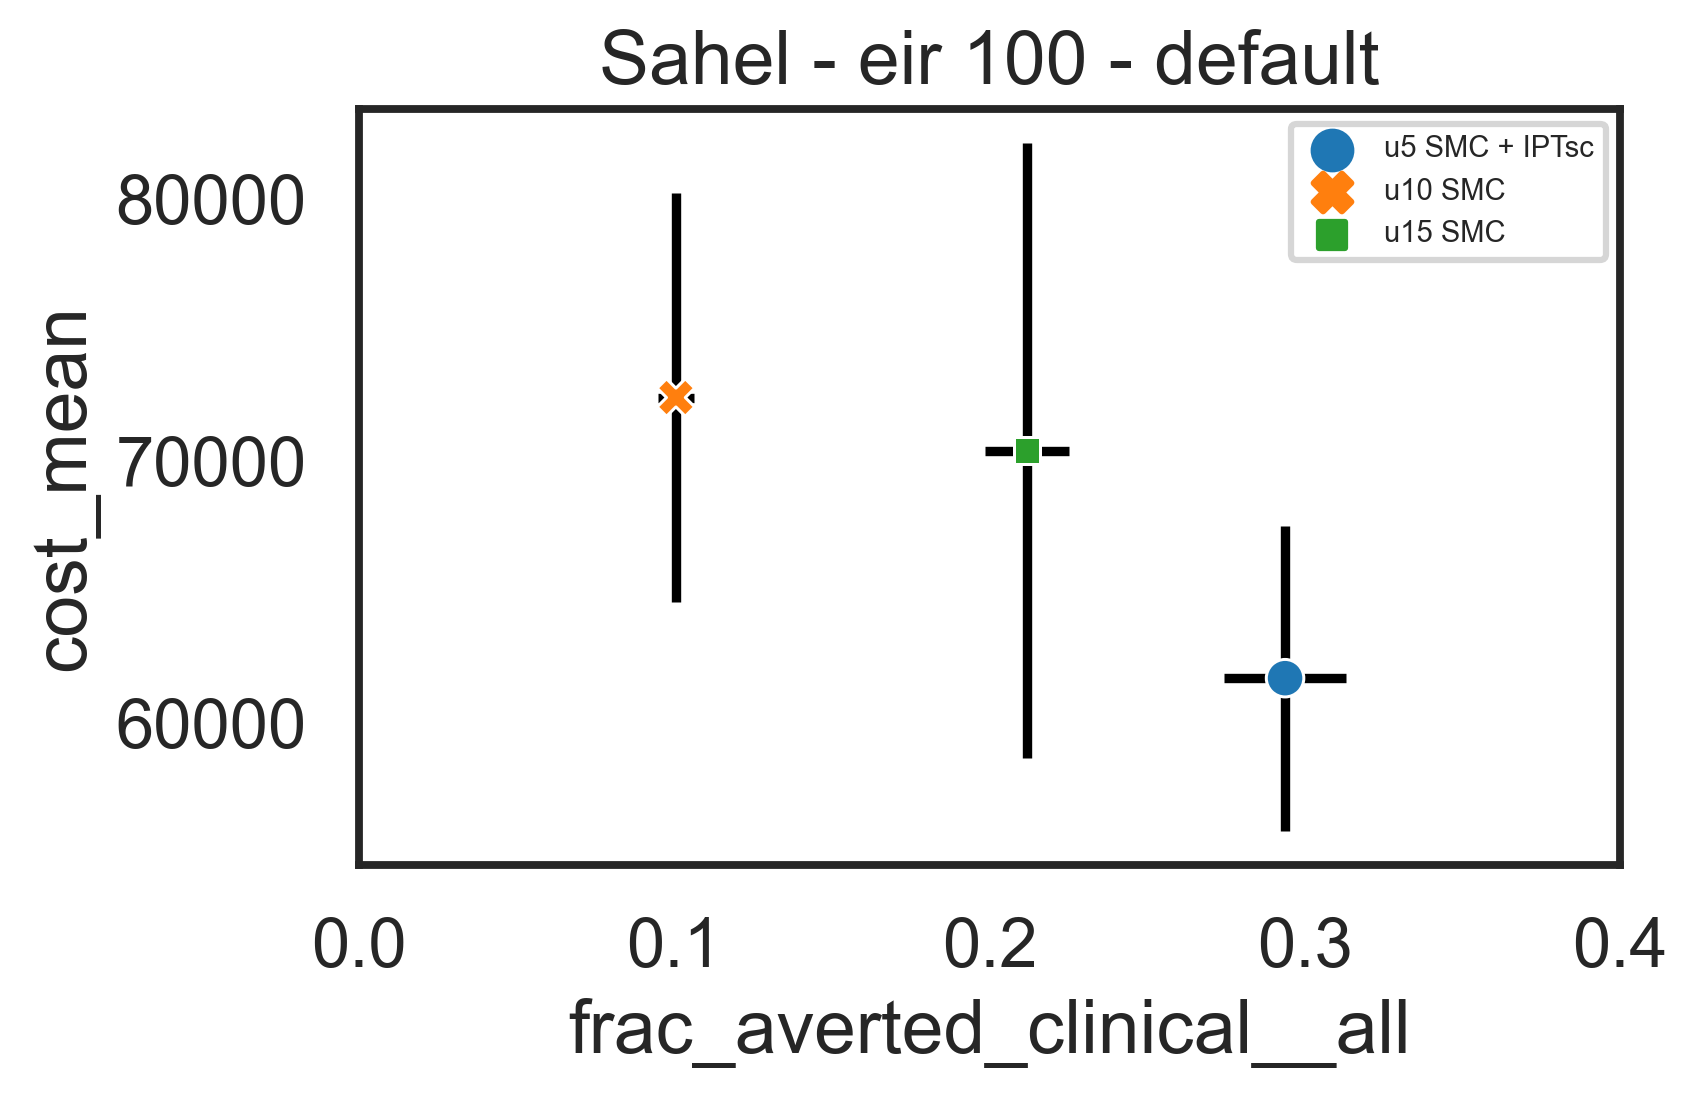

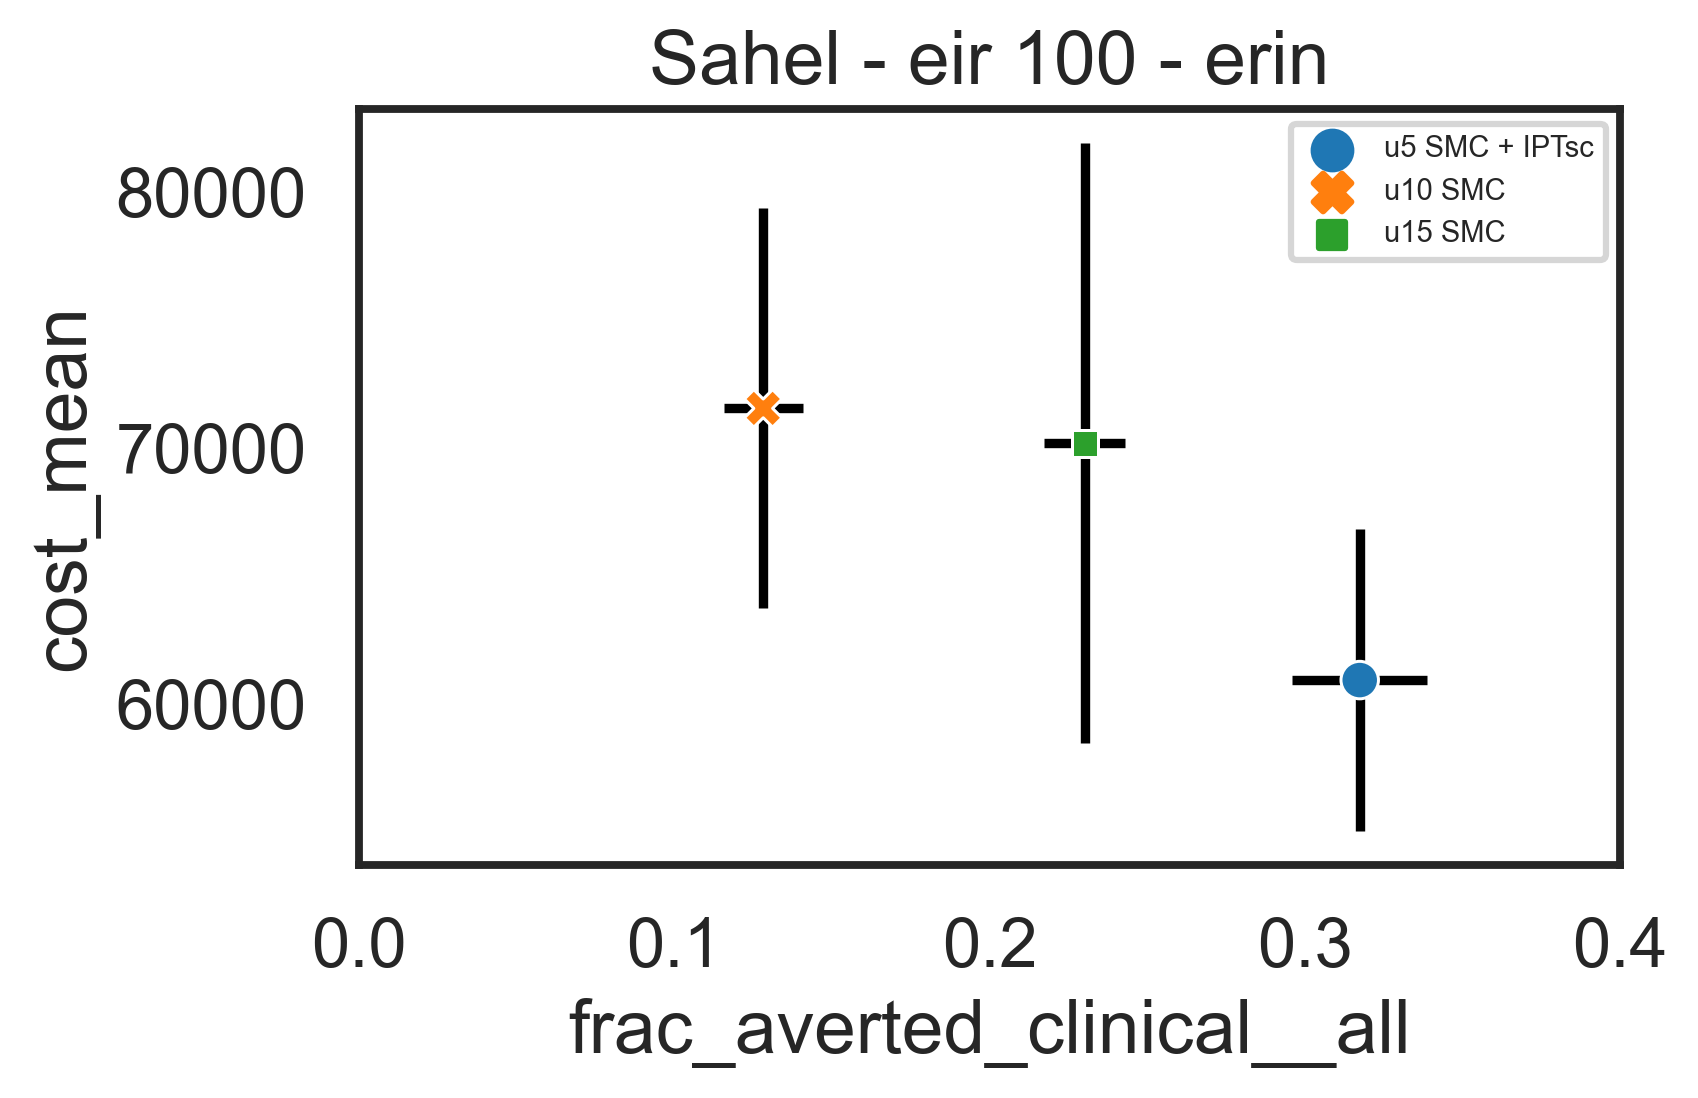

In [7]:
for a,sdf in df_smcplot.groupby(["baseline_eir", "smc_drug_config"]):
    plt.figure(dpi=300)
    sns.scatterplot(data=sdf, x="frac_averted_clinical__all", y="cost_mean", hue="label", zorder=2, style="label")
    
    yerr = np.zeros([2,len(sdf)])
    yerr[0:] = sdf["cost_mean"]-sdf["cost_low"]
    yerr[1:] = sdf["cost_high"]-sdf["cost_mean"]
    plt.errorbar(sdf["frac_averted_clinical__all"], sdf["cost_mean"], 
                 xerr=sdf["frac_averted_clinical__all_STDEV"], yerr=yerr,
                linestyle='none', color='black', zorder=1)
    plt.xlim([0,0.4])
    
    plt.legend(fontsize=7)
    plt.title(f"Sahel - eir {a[0]} - {a[1]}")
    
    plt.tight_layout()
    # plt.savefig(f"figs/Sahel_{str(a[0]).zfill(3)}_{a[1]}.png")
    # plt.savefig(f"figs/Sahel_{str(a[0]).zfill(3)}_{a[1]}.pdf")
    # plt.close('all')
        # plt.legend()

In [9]:
df_smcplot.to_csv("smc_drug_variations_full.csv", index=False)

In [13]:
list(df_smcplot.columns)

['archetype',
 'baseline_eir',
 'scenario_number',
 'smc_drug_config',
 'iptsc_rdts_used',
 'iptsc_drugs_used',
 'cases_treated',
 'severe_cases_treated',
 'received_smc',
 'received_ivermectin',
 'received_primaquine',
 'pfpr0_5',
 'pfpr2_10',
 'pfpr6_15',
 'pfpr16_500',
 'pfpr_all',
 'clinical_incidence0_5',
 'clinical_incidence2_10',
 'clinical_incidence6_15',
 'clinical_incidence16_500',
 'clinical_incidence_all',
 'severe_incidence0_5',
 'severe_incidence2_10',
 'severe_incidence6_15',
 'severe_incidence16_500',
 'severe_incidence_all',
 'pop0_5',
 'pop2_10',
 'pop6_15',
 'pop16_500',
 'pop_all',
 'avg_age',
 'avg_age_clinical_cases',
 'avg_age_severe_cases',
 'Run_Number',
 'iptsc_rdts_used_STDEV',
 'iptsc_drugs_used_STDEV',
 'cases_treated_STDEV',
 'severe_cases_treated_STDEV',
 'received_smc_STDEV',
 'received_ivermectin_STDEV',
 'received_primaquine_STDEV',
 'pfpr0_5_STDEV',
 'pfpr2_10_STDEV',
 'pfpr6_15_STDEV',
 'pfpr16_500_STDEV',
 'pfpr_all_STDEV',
 'clinical_incidence0_5_S

In [30]:
df_summary = df_smcplot.groupby(["scenario_number", "baseline_eir"]).agg(
    cases_averted_MEAN = ("frac_averted_clinical__all", "mean"),
    cases_averted_ERROR_FROM_PKPD = ("frac_averted_clinical__all", "std"),
    cases_averted_ERROR_FROM_STOCHASTIC = ("frac_averted_clinical__all_STDEV", "mean"),
    cost_mean_MEAN=("cost_mean", "mean"),
    cost_mean_ERROR_FROM_PKPD=("cost_mean", "std"),
    cost_high_MEAN = ("cost_high", "mean"),
    cost_low_MEAN=("cost_low", "mean")
).reset_index()

df_summary["cost_OPERATIONAL_UNCERTAINTY"] = 0.5*(df_summary["cost_high_MEAN"]-df_summary["cost_mean_MEAN"]) + \
0.5*(df_summary["cost_mean_MEAN"]-df_summary["cost_low_MEAN"])

df_summary["cases_averted_TOTAL_ERROR"] = np.sqrt(df_summary["cases_averted_ERROR_FROM_PKPD"]**2+df_summary["cases_averted_ERROR_FROM_STOCHASTIC"]**2)
df_summary["cost_TOTAL_ERROR"] = np.sqrt(df_summary["cost_mean_ERROR_FROM_PKPD"]**2 + df_summary["cost_OPERATIONAL_UNCERTAINTY"]**2)

df_summary["label"] = df_summary["scenario_number"].apply(lambda x: label_dict[x])

In [31]:
df_summary

,scenario_number,baseline_eir,cases_averted_MEAN,cases_averted_ERROR_FROM_PKPD,cases_averted_ERROR_FROM_STOCHASTIC,cost_mean_MEAN,cost_mean_ERROR_FROM_PKPD,cost_high_MEAN,cost_low_MEAN,cost_OPERATIONAL_UNCERTAINTY,cases_averted_TOTAL_ERROR,cost_TOTAL_ERROR,label
0,13,1,0.342381,0.008341,0.035117,33224.544639,540.514202,39662.143333,26786.945944,6437.598694,0.036094,6460.250193,u5 SMC + IPTsc
1,13,3,0.292862,0.010380,0.029974,41569.591944,1220.671498,48221.626000,34917.557889,6652.034056,0.031720,6763.105498,u5 SMC + IPTsc
2,13,10,0.318982,0.021102,0.031473,47639.157139,1458.119986,53883.654000,41394.660278,6244.496861,0.037893,6412.476506,u5 SMC + IPTsc
3,13,30,0.318803,0.010608,0.016661,55112.506389,2353.187444,61160.351333,49064.661444,6047.844944,0.019751,6489.523836,u5 SMC + IPTsc
4,13,100,0.305082,0.011867,0.020476,62675.668778,2377.954835,68543.316667,56808.020889,5867.647889,0.023666,6331.189536,u5 SMC + IPTsc
5,35,1,0.123186,0.039713,0.060697,39343.054750,1292.235669,47735.610000,30950.499500,8392.555250,0.072534,8491.457864,u10 SMC
6,35,3,0.111054,0.032966,0.017670,48319.869875,2007.504224,56847.312000,39792.427750,8527.442125,0.037403,8760.556056,u10 SMC
7,35,10,0.114760,0.026937,0.017838,56491.666542,2057.972286,64553.658667,48429.674417,8061.992125,0.032308,8320.514825,u10 SMC
8,35,30,0.110050,0.010325,0.015255,65364.387417,2577.318105,73304.332667,57424.442167,7939.945250,0.018421,8347.772109,u10 SMC
9,35,100,0.112449,0.014236,0.008919,73645.969417,2903.233032,81473.564667,65818.374167,7827.595250,0.016799,8348.653151,u10 SMC


In [28]:
df_summary.columns

Index(['scenario_number', 'baseline_eir', 'cases_averted_MEAN',
       'cases_averted_ERROR_FROM_PKPD', 'cases_averted_ERROR_FROM_STOCHASTIC',
       'cost_mean_MEAN', 'cost_mean_ERROR_FROM_PKPD', 'cost_high_MEAN',
       'cost_low_MEAN', 'cost_OPERATIONAL_UNCERTAINTY',
       'cases_averted_TOTAL_ERROR', 'cost_TOTAL_ERROR'],
      dtype='object')

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


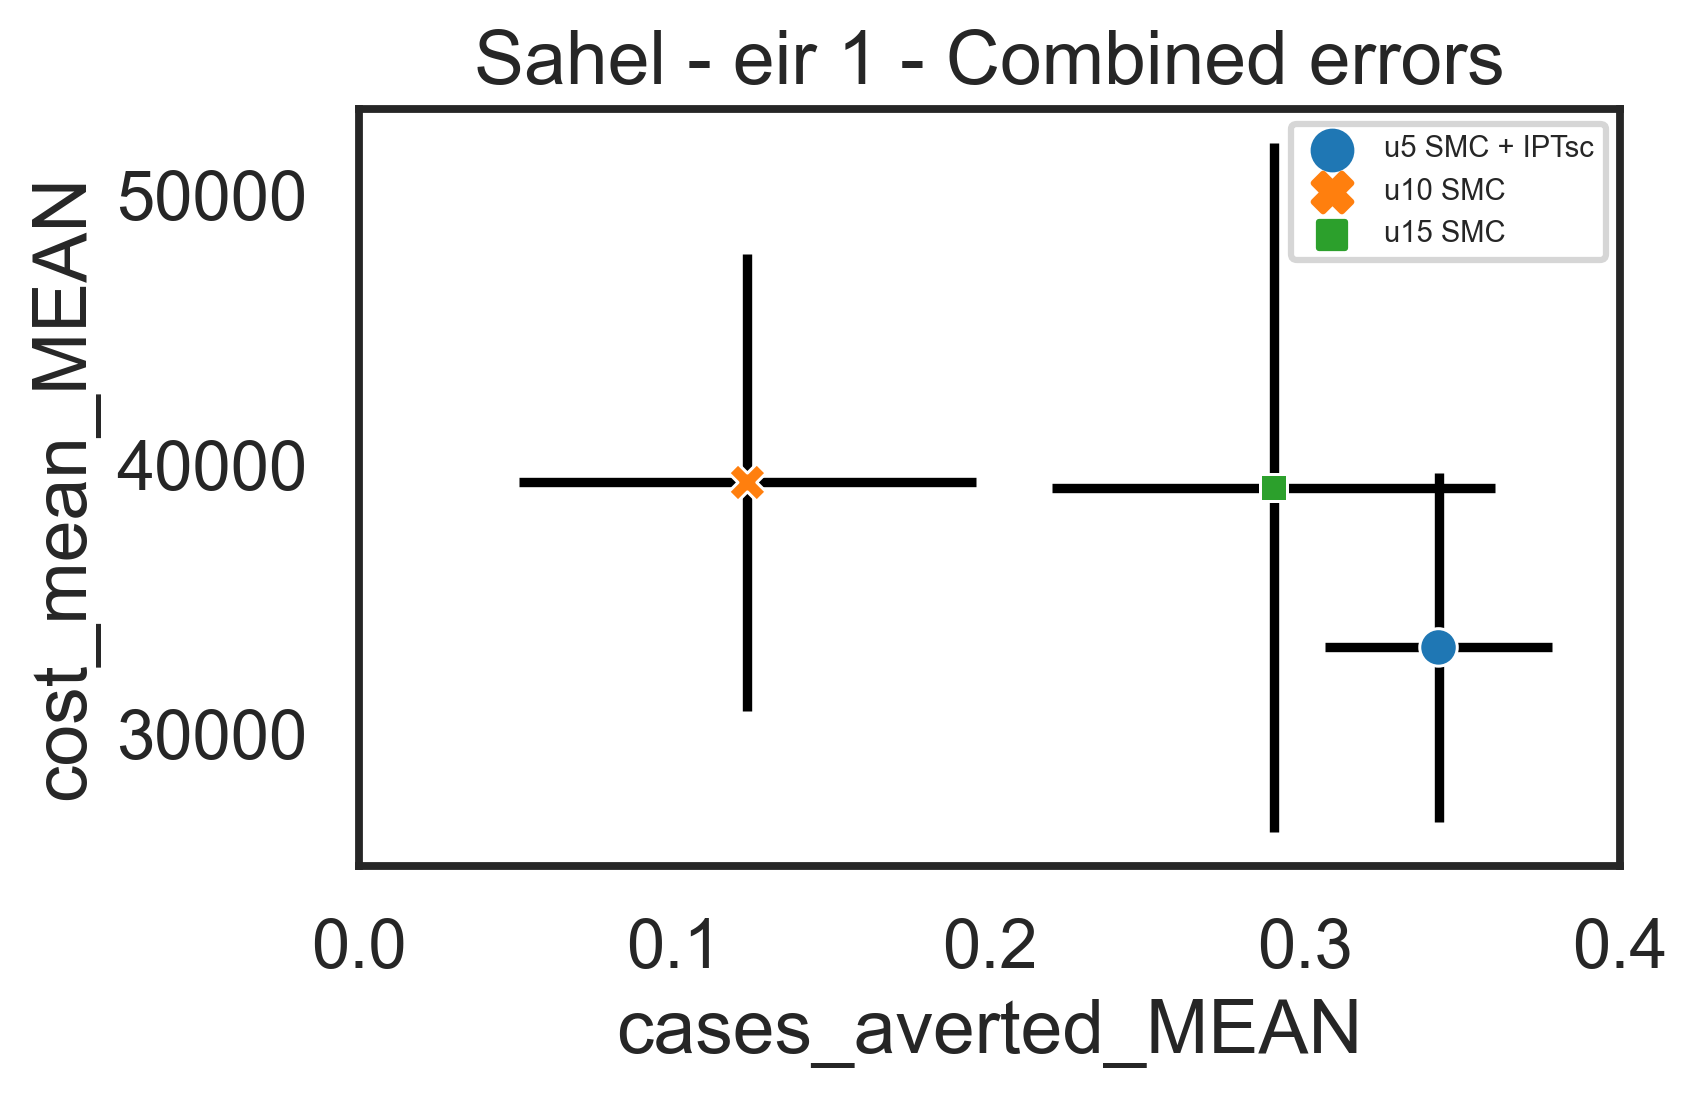

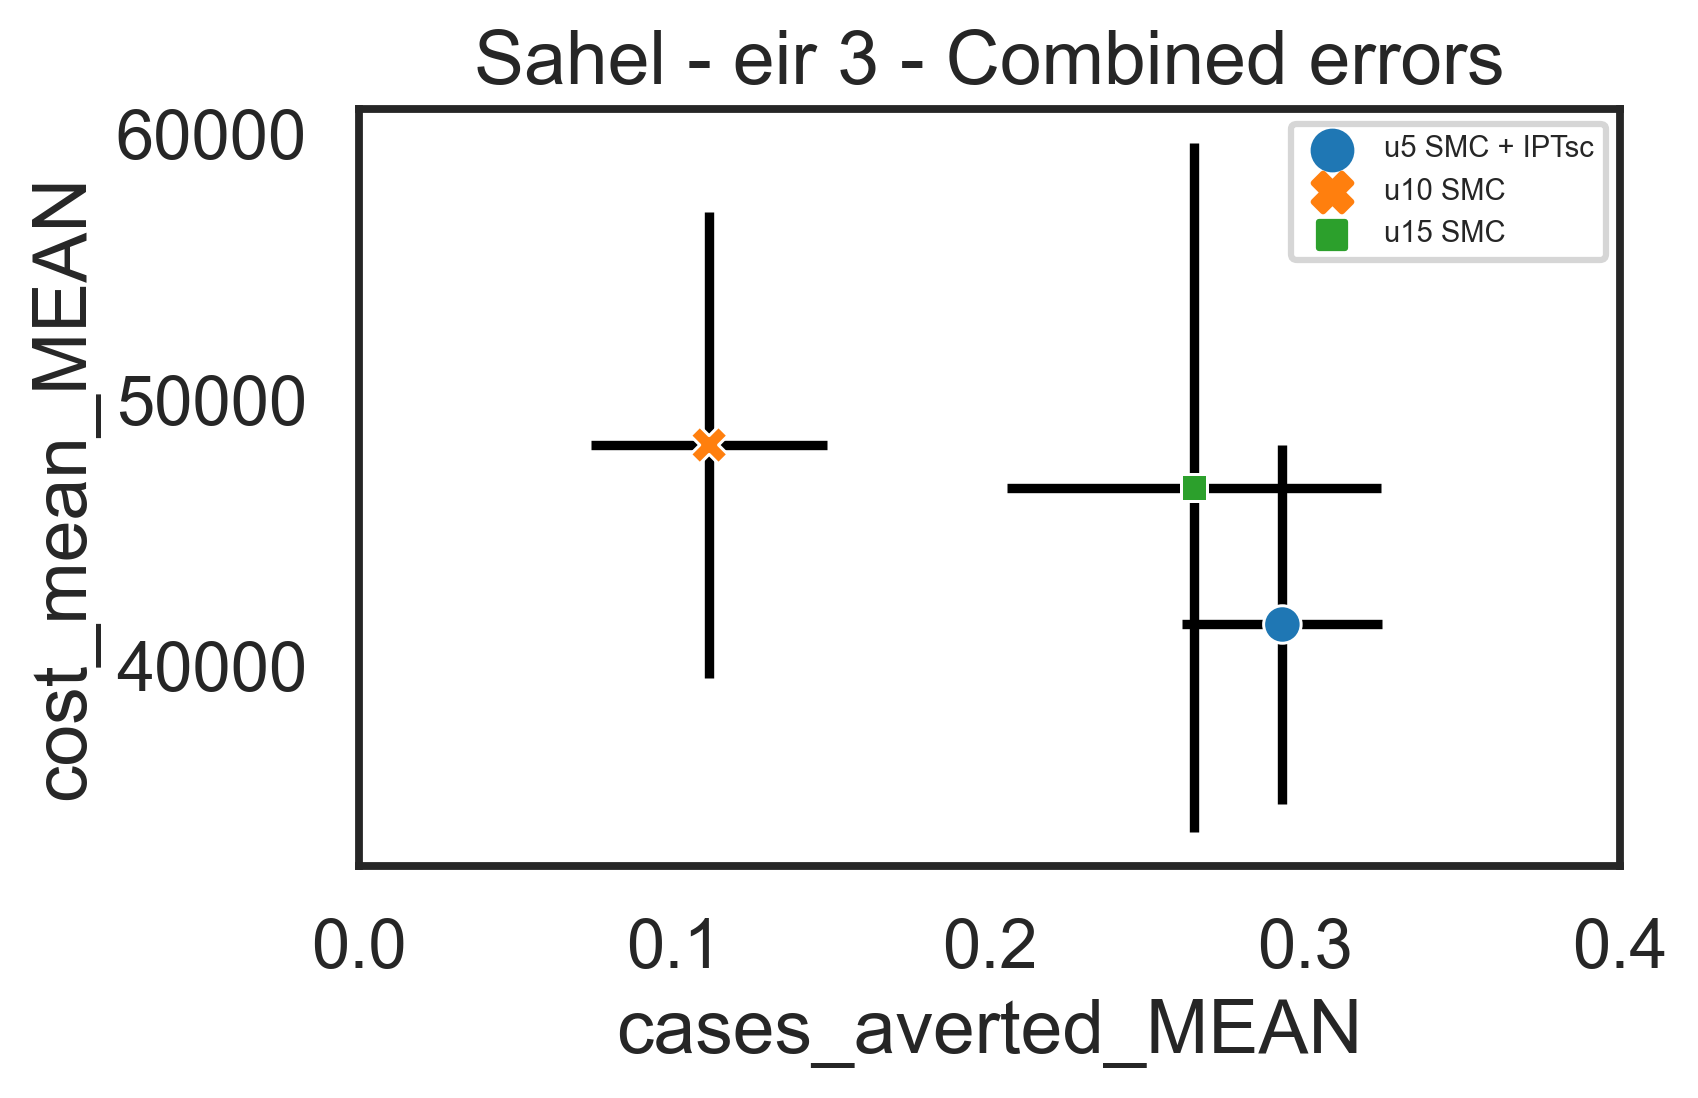

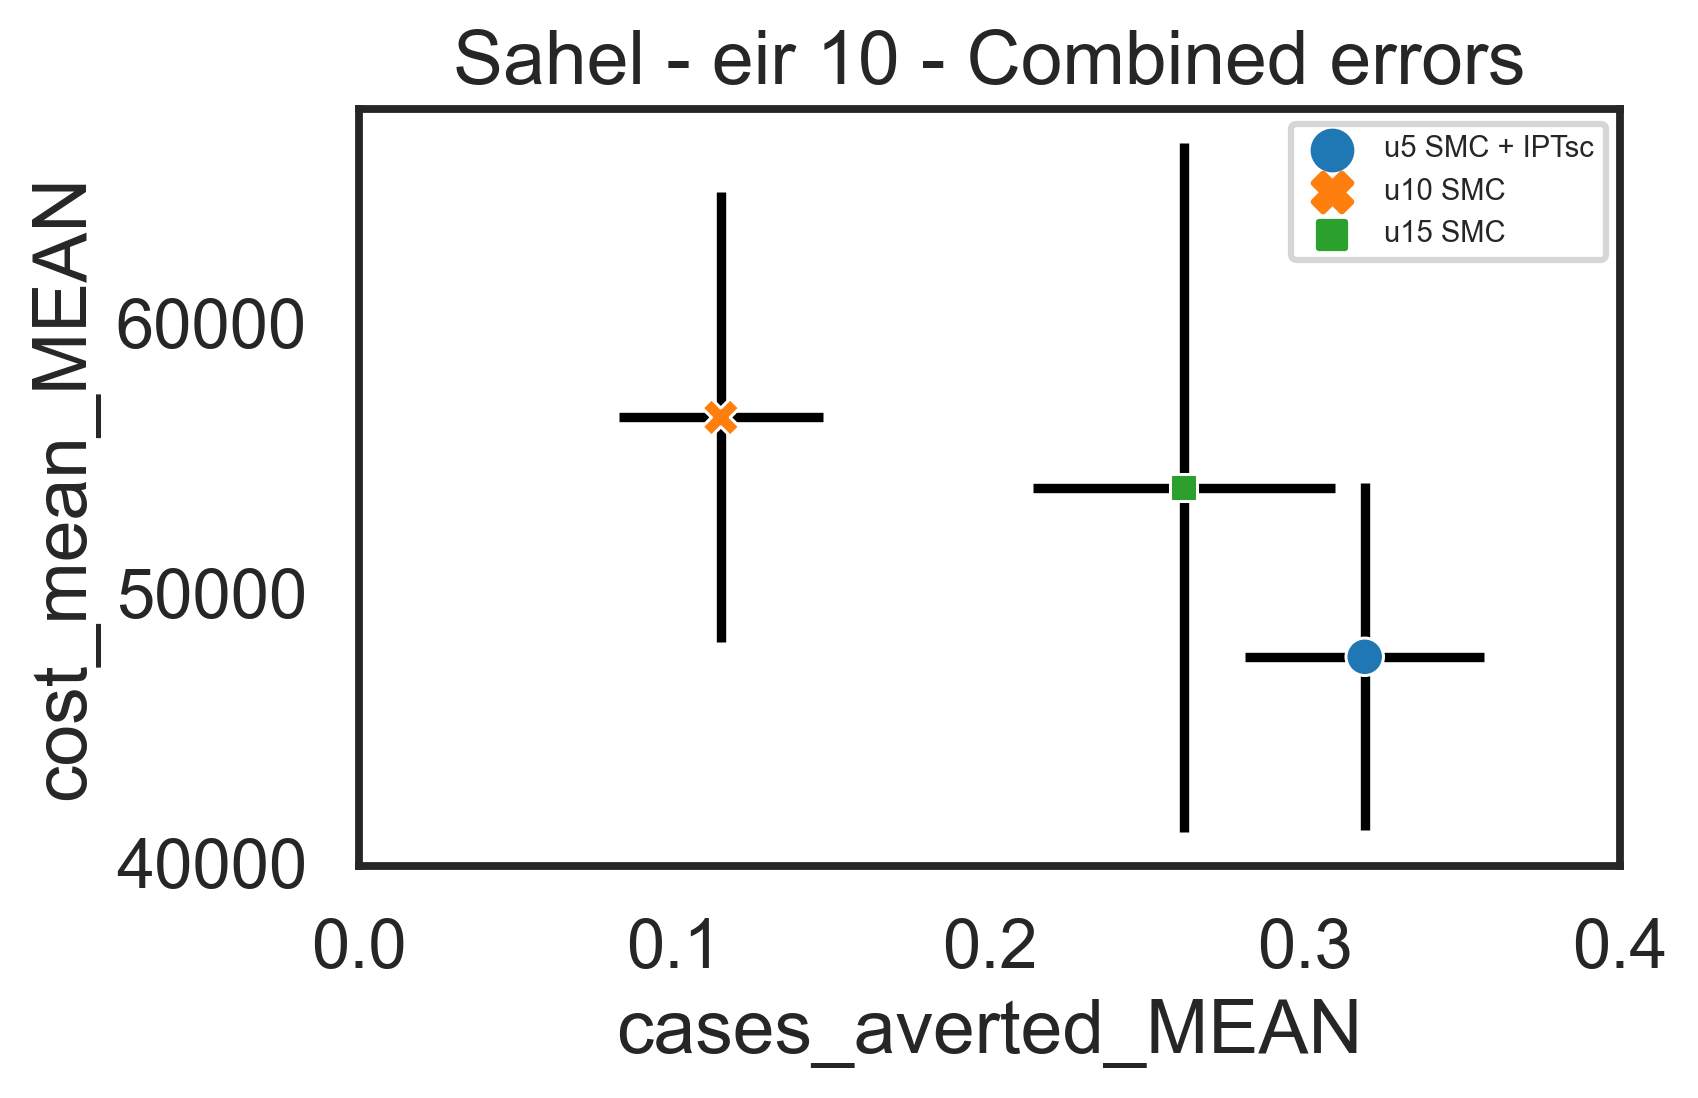

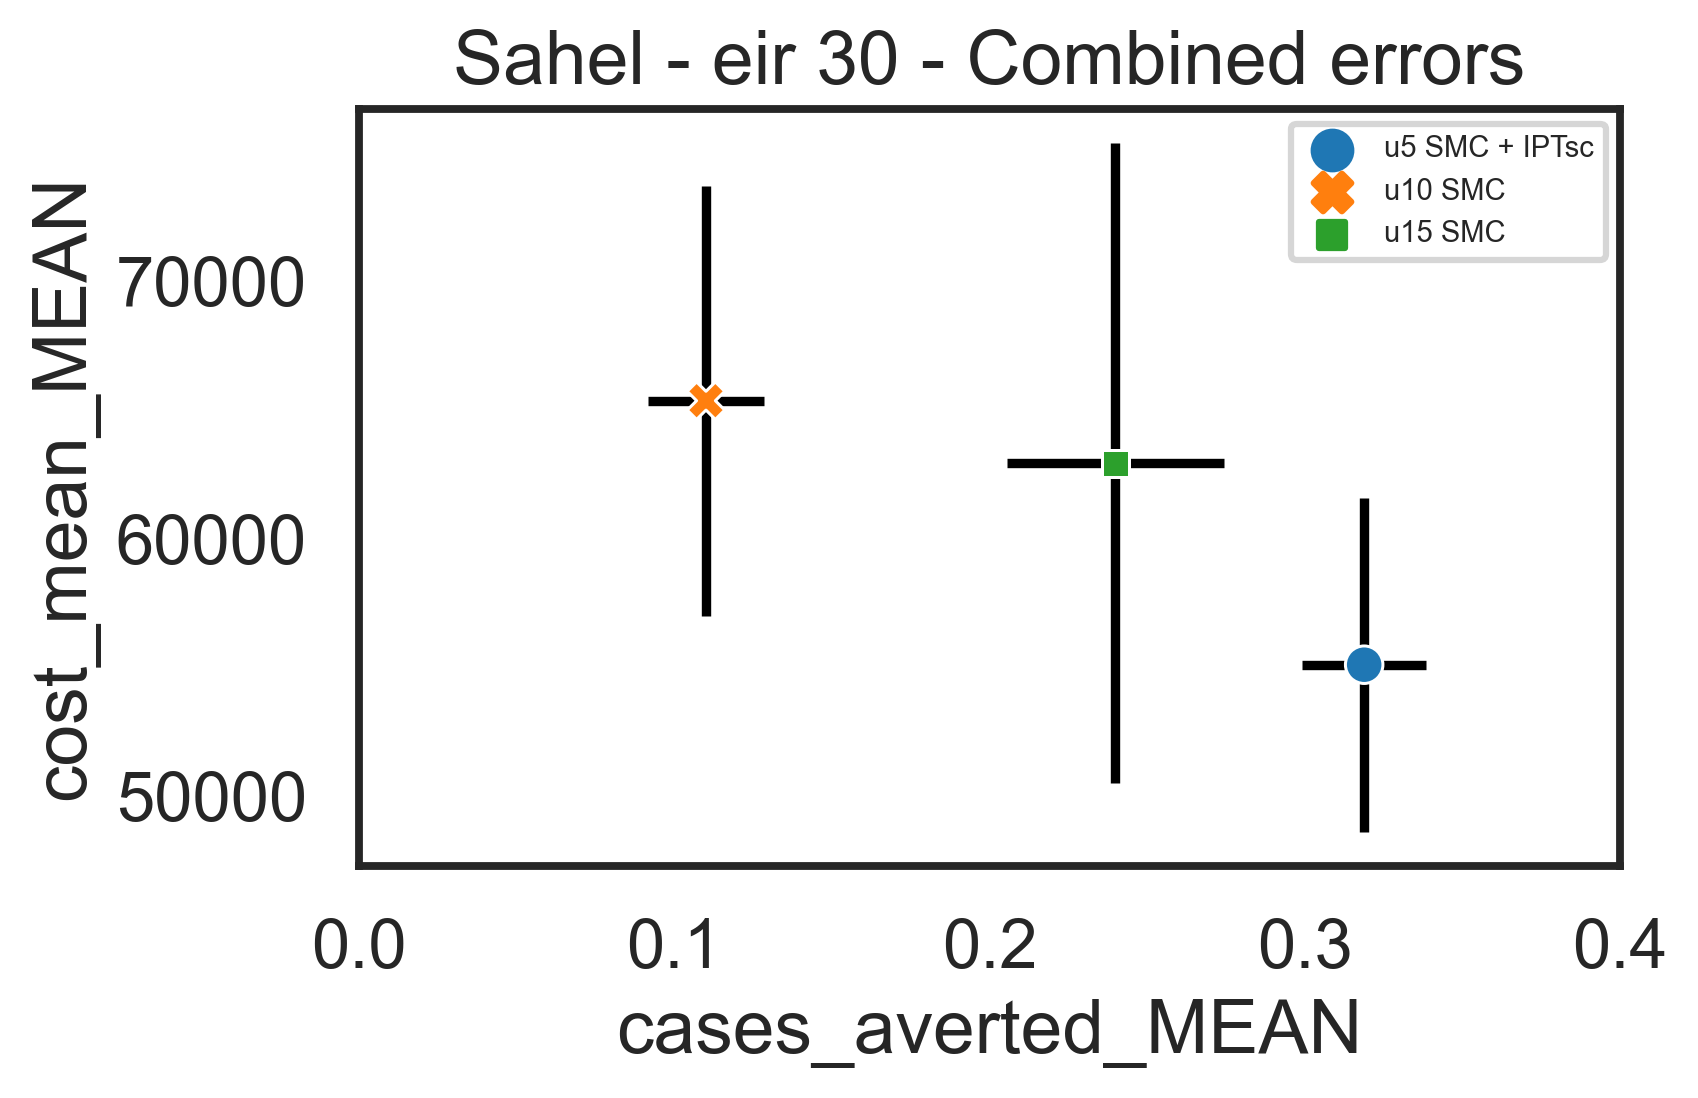

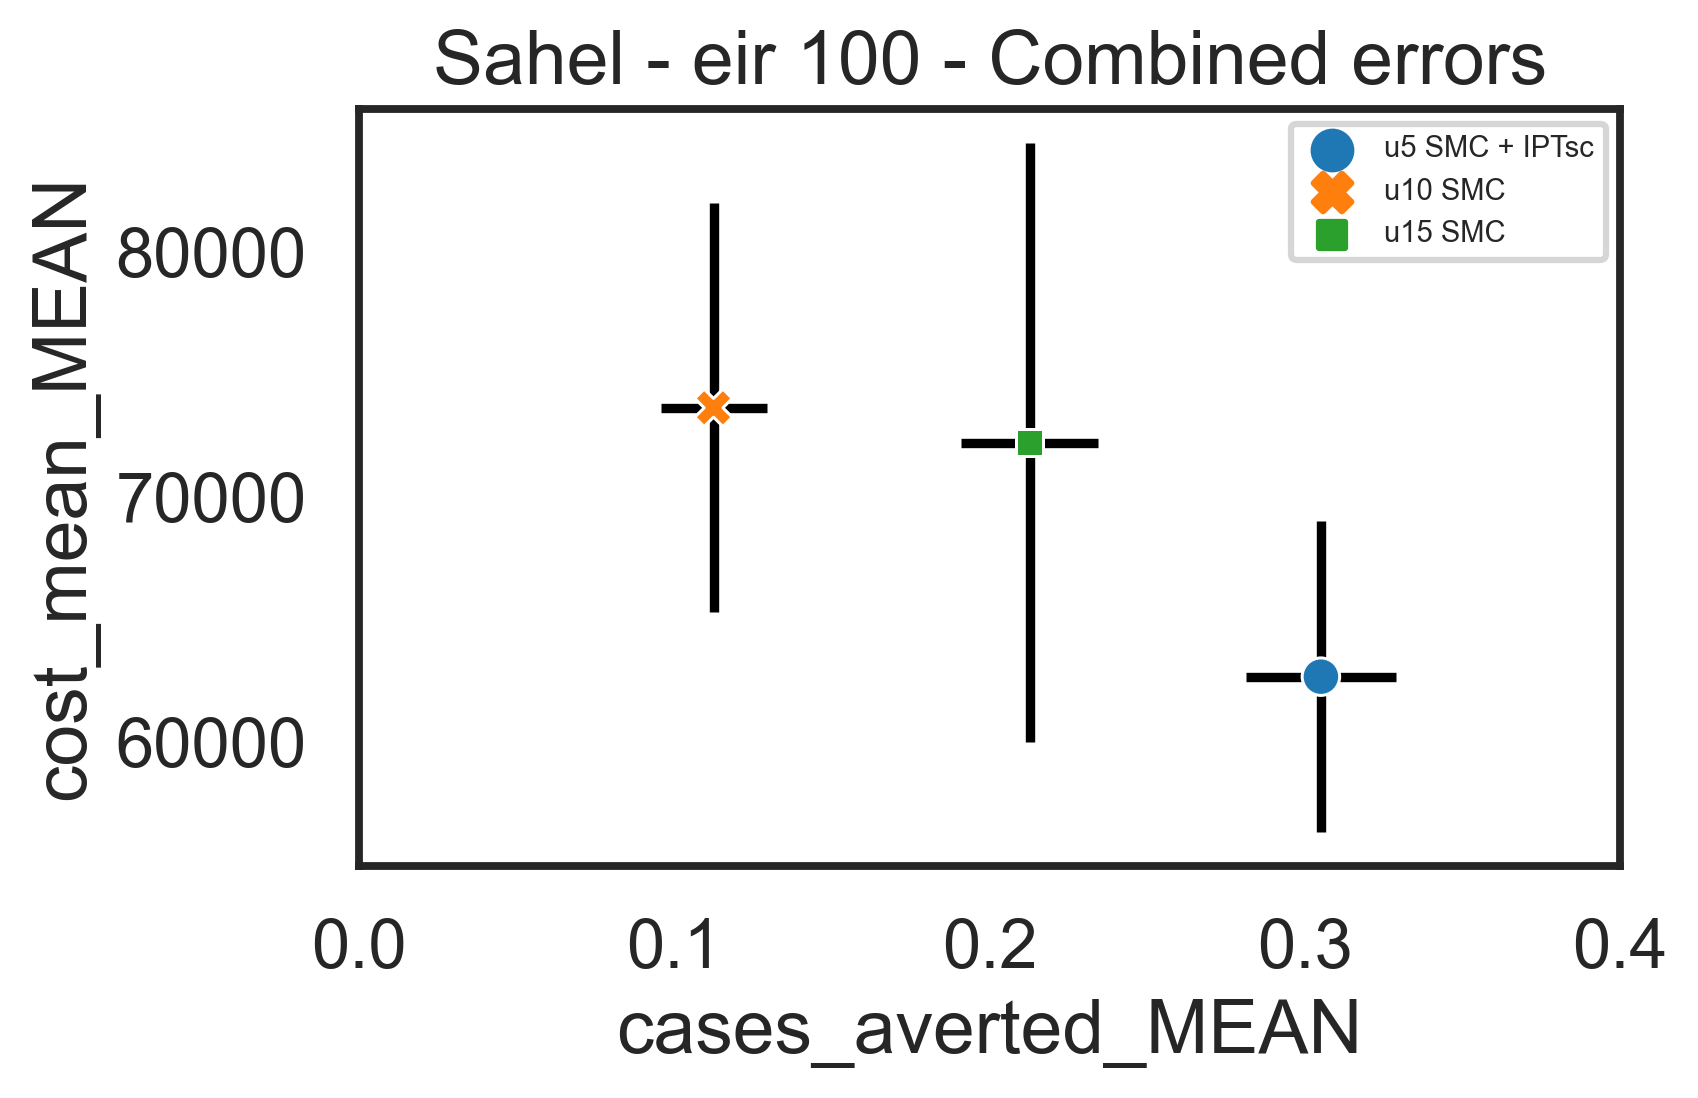

In [37]:
for a,sdf in df_summary.groupby("baseline_eir"):
    plt.figure(dpi=300)
    sns.scatterplot(data=sdf, x="cases_averted_MEAN", y="cost_mean_MEAN", hue="label", zorder=2, style="label")
    
    plt.errorbar(sdf["cases_averted_MEAN"], sdf["cost_mean_MEAN"], 
                 xerr=sdf["cases_averted_TOTAL_ERROR"], yerr=sdf["cost_TOTAL_ERROR"],
                linestyle='none', color='black', zorder=1)
    plt.xlim([0,0.4])
    
    plt.legend(fontsize=7)
    plt.title(f"Sahel - eir {a} - Combined errors")
    
    plt.tight_layout()
    plt.savefig(f"smc_{str(a).zfill(3)}_combined.png")
    plt.savefig(f"smc_{str(a).zfill(3)}_combined.pdf")
    # plt.savefig(f"figs/Sahel_{str(a[0]).zfill(3)}_{a[1]}.pdf")
    # plt.close('all')
        # plt.legend()